In [1]:
pip install fredapi matplotlib seaborn transformers install torch


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install


In [2]:
pip install --upgrade fredapi 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
#import modules
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from fredapi import Fred

In [5]:

pd.set_option('display.max_columns', 10)  # Adjust the number as needed

# Set the maximum column width
pd.set_option('display.max_colwidth', 50)  # Adjust the number as needed

In [6]:
fred_key = 'ac5c2561c99f444e047932a31cf9d186' 

In [7]:
import requests

#importing fred API data using URL instead of fetching it using the methods because of 
url = f"https://api.stlouisfed.org/fred/series/search?search_text=GDP&filter_variable=seasonal_adjustment&filter_value=Seasonally%20Adjusted&order_by=popularity&sort_order=desc&api_key={fred_key}"

response = requests.get(url)

if response.status_code == 200: 
    # Print the raw response content before parsing as JSON
    print("Raw Response Content:", response.text)
    try:
        data = response.json()
        print(data)
    except requests.exceptions.JSONDecodeError:
        print("Error decoding JSON. Response might not be in JSON format.")
else:
    print(f"Failed to retrieve data: {response.status_code}")


Raw Response Content: <?xml version="1.0" encoding="utf-8" ?>
<seriess realtime_start="2024-08-29" realtime_end="2024-08-29" filter_variable="seasonal_adjustment" filter_value="Seasonally Adjusted" order_by="popularity" sort_order="desc" count="5873" offset="0" limit="1000">
  <series id="GFDEGDQ188S" realtime_start="2024-08-29" realtime_end="2024-08-29" title="Federal Debt: Total Public Debt as Percent of Gross Domestic Product" observation_start="1966-01-01" observation_end="2024-01-01" frequency="Quarterly" frequency_short="Q" units="Percent of GDP" units_short="% of GDP" seasonal_adjustment="Seasonally Adjusted" seasonal_adjustment_short="SA" last_updated="2024-06-27 08:07:01-05" popularity="84" group_popularity="84" notes="Federal Debt: Total Public Debt as Percent of Gross Domestic Product (GFDEGDQ188S) (https://fred.stlouisfed.org/series/GFDEGDQ188S) was first constructed by the Federal Reserve Bank of St. Louis in October 2012. It is calculated using Federal Government Debt: To

1. Create FRED object

In [8]:
fred = Fred(api_key=fred_key)

2. Search for economic Data!

In [9]:
import requests
import xml.etree.ElementTree as ET

# Your API key
fred_key = "ac5c2561c99f444e047932a31cf9d186"

# Construct the URL
url = f"https://api.stlouisfed.org/fred/series/search?search_text=GDP&filter_variable=seasonal_adjustment&filter_value=Seasonally%20Adjusted&order_by=popularity&sort_order=desc&api_key={fred_key}"

# Make the GET request to the FRED API
response = requests.get(url)

if response.status_code == 200:
    # Parse the XML response
    root = ET.fromstring(response.content)
    
    # Iterate over the series in the XML and print relevant details
    for series in root.findall('series'):
        series_id = series.get('id')
        title = series.get('title')
        popularity = series.get('popularity')
        print(f"Series ID: {series_id}, Title: {title}, Popularity: {popularity}")
else:
    print(f"Failed to retrieve data: {response.status_code}")

Series ID: GFDEGDQ188S, Title: Federal Debt: Total Public Debt as Percent of Gross Domestic Product, Popularity: 84
Series ID: PAYEMS, Title: All Employees, Total Nonfarm, Popularity: 83
Series ID: M2V, Title: Velocity of M2 Money Stock, Popularity: 82
Series ID: GDPDEF, Title: Gross Domestic Product: Implicit Price Deflator, Popularity: 74
Series ID: M1V, Title: Velocity of M1 Money Stock, Popularity: 68
Series ID: JPNRGDPEXP, Title: Real Gross Domestic Product for Japan, Popularity: 65
Series ID: NGDPSAXDCUSQ, Title: Nominal Gross Domestic Product for United States, Popularity: 64
Series ID: CLVMNACSCAB1GQDE, Title: Real Gross Domestic Product for Germany, Popularity: 63
Series ID: NGDPRSAXDCCAQ, Title: Real Gross Domestic Product for Canada, Popularity: 60
Series ID: UKNGDP, Title: Gross Domestic Product for United Kingdom, Popularity: 58
Series ID: JPNNGDP, Title: Gross Domestic Product for Japan, Popularity: 58
Series ID: CLVMNACSCAB1GQIT, Title: Real Gross Domestic Product for It

3. Pull Raw Data & plot

In [10]:
GDP = fred.get_series(series_id="GDP")

<Axes: title={'center': 'GDP'}>

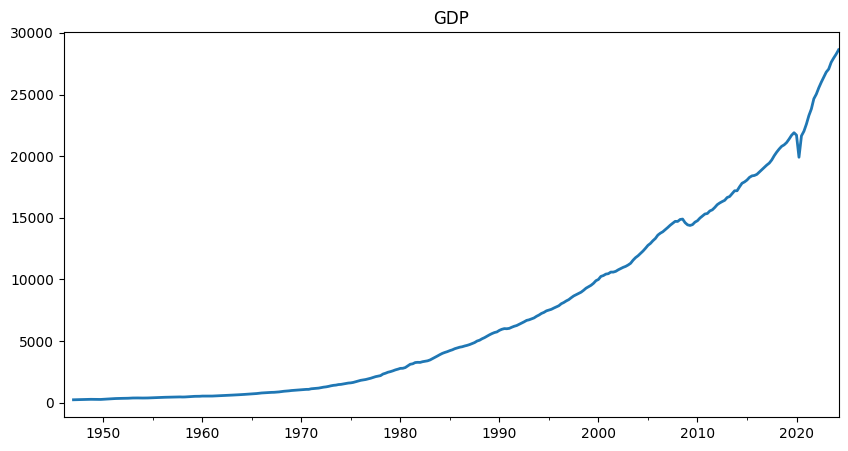

In [11]:
GDP.plot(figsize=(10,5), title='GDP', lw=2)

4. Pull and Join multiple Data Series

In [12]:
unemp_df = fred.search('unemployment rate')
#unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent" ')
#unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df

,id,realtime_start,realtime_end,title,observation_start,...,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,
UNRATE,UNRATE,2024-08-29,2024-08-29,Unemployment Rate,1948-01-01,...,Seasonally Adjusted,SA,2024-08-02 07:46:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-08-29,2024-08-29,Unemployment Rate,1948-01-01,...,Not Seasonally Adjusted,NSA,2024-08-02 07:46:07-05:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-08-29,2024-08-29,Unemployment Rate - Black or African American,1972-01-01,...,Seasonally Adjusted,SA,2024-08-02 07:46:02-05:00,72,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2024-08-29,2024-08-29,Unemployment Rate - Black or African American,1972-01-01,...,Not Seasonally Adjusted,NSA,2024-08-02 07:46:21-05:00,23,The series comes from the 'Current Population ...
NROU,NROU,2024-08-29,2024-08-29,Noncyclical Rate of Unemployment,1949-01-01,...,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
...,...,...,...,...,...,...,...,...,...,...,...
LRUN74TTDKQ156N,LRUN74TTDKQ156N,2024-08-29,2024-08-29,Infra-Annual Labor Statistics: Unemployment Ra...,1995-01-01,...,Not Seasonally Adjusted,NSA,2024-07-15 13:47:08-05:00,5,OECD Data Filters: REF_AREA: DNK MEASURE: UNE...
WICH620UR,WICH620UR,2024-08-29,2024-08-29,"Unemployment Rate in Wichita, KS (MSA)",1990-01-01,...,Smoothed Seasonally Adjusted,SSA,2024-08-28 13:31:05-05:00,5,None
CNERURN,CNERURN,2024-08-29,2024-08-29,Unemployment Rate in Northeast Census Region,1976-01-01,...,Not Seasonally Adjusted,NSA,2024-08-20 12:36:16-05:00,5,None


In [13]:
unemp_df = fred.search('unemployment rate', filter=('frequency', 'Monthly'))
#unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent" ')
#unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df

,id,realtime_start,realtime_end,title,observation_start,...,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,
UNRATE,UNRATE,2024-08-29,2024-08-29,Unemployment Rate,1948-01-01,...,Seasonally Adjusted,SA,2024-08-02 07:46:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-08-29,2024-08-29,Unemployment Rate,1948-01-01,...,Not Seasonally Adjusted,NSA,2024-08-02 07:46:07-05:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-08-29,2024-08-29,Unemployment Rate - Black or African American,1972-01-01,...,Seasonally Adjusted,SA,2024-08-02 07:46:02-05:00,72,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2024-08-29,2024-08-29,Unemployment Rate - Black or African American,1972-01-01,...,Not Seasonally Adjusted,NSA,2024-08-02 07:46:21-05:00,23,The series comes from the 'Current Population ...
CAUR,CAUR,2024-08-29,2024-08-29,Unemployment Rate in California,1976-01-01,...,Seasonally Adjusted,SA,2024-08-20 12:36:01-05:00,64,None
...,...,...,...,...,...,...,...,...,...,...,...
KYWHIT5URN,KYWHIT5URN,2024-08-29,2024-08-29,"Unemployment Rate in Whitley County, KY",1990-01-01,...,Not Seasonally Adjusted,NSA,2024-08-28 10:16:04-05:00,4,These data come from the Current Population Su...
OHHANC5URN,OHHANC5URN,2024-08-29,2024-08-29,"Unemployment Rate in Hancock County, OH",1990-01-01,...,Not Seasonally Adjusted,NSA,2024-08-28 10:27:10-05:00,4,These data come from the Current Population Su...
MNCARV9URN,MNCARV9URN,2024-08-29,2024-08-29,"Unemployment Rate in Carver County, MN",1990-01-01,...,Not Seasonally Adjusted,NSA,2024-08-28 10:11:07-05:00,4,These data come from the Current Population Su...


Import the API via URL 

In [14]:
import requests

#URLS for each macroeconomic indicator
urls = {
    "GDP Growth Rate": f"https://api.stlouisfed.org/fred/series/observations?series_id=A191RL1Q225SBEA&api_key={fred_key}&file_type=json",
    "Inflation Rate (CPI)": f"https://api.stlouisfed.org/fred/series/observations?series_id=CPIAUCSL&api_key={fred_key}&file_type=json",
    "Unemployment Rate": f"https://api.stlouisfed.org/fred/series/observations?series_id=UNRATE&api_key={fred_key}&file_type=json",

}

# Dictionary to store data
macro_data = {}

# Retrieve data for each indicator
for indicator, url in urls.items():
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()['observations']
        df = pd.DataFrame(data)
        df['date'] = pd.to_datetime(df['date'])
        # Convert 'value' column to numeric, coercing errors to NaN
        df['value'] = pd.to_numeric(df['value'], errors='coerce')
        # Optionally, drop rows with NaN values or fill them with a specific value
        df.dropna(subset=['value'], inplace=True)  # Drops rows with NaN values
        # df['value'].fillna(0, inplace=True)  # Alternatively, fill NaN with 0
        macro_data[indicator] = df
    else: 
        print(f"Failed to retrieve data for {indicator}: {response.status_code}")

# Example: Accessing and printing the GDP Growth Rate data
print(macro_data["GDP Growth Rate"].head())

  realtime_start realtime_end       date  value
0     2024-08-17   2024-08-17 1947-04-01   -1.0
1     2024-08-17   2024-08-17 1947-07-01   -0.8
2     2024-08-17   2024-08-17 1947-10-01    6.4
3     2024-08-17   2024-08-17 1948-01-01    6.2
4     2024-08-17   2024-08-17 1948-04-01    6.8


In [15]:
for indicator, df in macro_data.items():
    print(f"\nIndicator: {indicator}")
    print(df.head())


Indicator: GDP Growth Rate
  realtime_start realtime_end       date  value
0     2024-08-17   2024-08-17 1947-04-01   -1.0
1     2024-08-17   2024-08-17 1947-07-01   -0.8
2     2024-08-17   2024-08-17 1947-10-01    6.4
3     2024-08-17   2024-08-17 1948-01-01    6.2
4     2024-08-17   2024-08-17 1948-04-01    6.8

Indicator: Inflation Rate (CPI)
  realtime_start realtime_end       date  value
0     2024-08-14   2024-08-14 1947-01-01  21.48
1     2024-08-14   2024-08-14 1947-02-01  21.62
2     2024-08-14   2024-08-14 1947-03-01  22.00
3     2024-08-14   2024-08-14 1947-04-01  22.00
4     2024-08-14   2024-08-14 1947-05-01  21.95

Indicator: Unemployment Rate
  realtime_start realtime_end       date  value
0     2024-08-02   2024-08-02 1948-01-01    3.4
1     2024-08-02   2024-08-02 1948-02-01    3.8
2     2024-08-02   2024-08-02 1948-03-01    4.0
3     2024-08-02   2024-08-02 1948-04-01    3.9
4     2024-08-02   2024-08-02 1948-05-01    3.5


Create Dataframes 

In [16]:
start_date = "2014-01-01"
end_date = "2024-12-31"

#Filter and merge data frames
filtered_data =  {}

for indicator, df in macro_data.items():
    #ensure 'date' column is in date time format
    df['date']=pd.to_datetime(df['date'])
    #filter the data frame by the specficied date range
    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    filtered_data[indicator]= filtered_df

#start with the first filtered dataframe
#combined_df = filtered_data["GDP Growth Rate"].rename(columns={"value": "GDP growth rate"})[["date", "GDP growth rate"]]

# Loop through the remaining filtered dataframes to merge them into a combined dataframe
for indicator, df in filtered_data.items():
    print(f"\n{indicator} DataFrame:")
    print(df.head())

    #print summary statistics 
    summary_stats = df.describe()
    print(f"\nSummary Statistics for {indicator}:")
    print(summary_stats)




GDP Growth Rate DataFrame:
    realtime_start realtime_end       date  value
267     2024-08-17   2024-08-17 2014-01-01   -1.4
268     2024-08-17   2024-08-17 2014-04-01    5.3
269     2024-08-17   2024-08-17 2014-07-01    5.0
270     2024-08-17   2024-08-17 2014-10-01    2.0
271     2024-08-17   2024-08-17 2015-01-01    3.6

Summary Statistics for GDP Growth Rate:
                                date      value
count                             42  42.000000
mean   2019-02-14 23:25:42.857142784   2.578571
min              2014-01-01 00:00:00 -28.000000
25%              2016-07-24 00:00:00   2.000000
50%              2019-02-15 00:00:00   2.550000
75%              2021-09-08 00:00:00   3.550000
max              2024-04-01 00:00:00  34.800000
std                              NaN   7.272351

Inflation Rate (CPI) DataFrame:
    realtime_start realtime_end       date    value
804     2024-08-14   2024-08-14 2014-01-01  235.288
805     2024-08-14   2024-08-14 2014-02-01  235.547
806     20

Create Dataframes

In [17]:
import pandas as pd

# Define the date range for filtering
start_date = "2014-01-01"
end_date = "2024-12-31"

# Dictionary to store individual DataFrames
dataframes = {}

# Filter the data frames for each indicator individually
for indicator, df in macro_data.items():
    # Ensure 'date' column is in datetime format
    df['date'] = pd.to_datetime(df['date'])
    # Filter the DataFrame by the specified date range
    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    # Drop unnecessary columns (realtime_start and realtime_end)
    filtered_df = filtered_df.drop(columns=['realtime_start', 'realtime_end'])
    # Rename the 'value' column to the name of the indicator
    filtered_df = filtered_df.rename(columns={"value": indicator})
    filtered_df = filtered_df.reset_index(drop=True)

    # Store the filtered and renamed DataFrame in the dictionary
    dataframes[indicator] = filtered_df  # Save in dataframes dictionary for easy access

# Example: Access the GDP Growth Rate DataFrame
gdp_df = dataframes["GDP Growth Rate"]
print("\nGDP Growth Rate DataFrame:")
print(gdp_df.head())

# Example: Access the Inflation Rate (CPI) DataFrame
inflation_df = dataframes["Inflation Rate (CPI)"]
print("\nInflation Rate (CPI) DataFrame:")
print(inflation_df.head())

# Example: Access the Unemployment Rate DataFrame
unemp_df = dataframes["Unemployment Rate"]
print("\nUnemployment Rate DataFrame:")
print(unemp_df.head())



GDP Growth Rate DataFrame:
        date  GDP Growth Rate
0 2014-01-01             -1.4
1 2014-04-01              5.3
2 2014-07-01              5.0
3 2014-10-01              2.0
4 2015-01-01              3.6

Inflation Rate (CPI) DataFrame:
        date  Inflation Rate (CPI)
0 2014-01-01               235.288
1 2014-02-01               235.547
2 2014-03-01               236.028
3 2014-04-01               236.468
4 2014-05-01               236.918

Unemployment Rate DataFrame:
        date  Unemployment Rate
0 2014-01-01                6.6
1 2014-02-01                6.7
2 2014-03-01                6.7
3 2014-04-01                6.2
4 2014-05-01                6.3


Display DataFrames shape. GDP is shorter and has less data points. Must decide if it is worth merging with the stock market data. 


In [18]:
unemp_df

,date,Unemployment Rate
0,2014-01-01,6.6
1,2014-02-01,6.7
2,2014-03-01,6.7
3,2014-04-01,6.2
4,2014-05-01,6.3
...,...,...
122,2024-03-01,3.8
123,2024-04-01,3.9
124,2024-05-01,4.0
125,2024-06-01,4.1


In [19]:
inflation_df

,date,Inflation Rate (CPI)
0,2014-01-01,235.288
1,2014-02-01,235.547
2,2014-03-01,236.028
3,2014-04-01,236.468
4,2014-05-01,236.918
...,...,...
122,2024-03-01,312.230
123,2024-04-01,313.207
124,2024-05-01,313.225
125,2024-06-01,313.049


In [20]:
gdp_df

,date,GDP Growth Rate
0,2014-01-01,-1.4
1,2014-04-01,5.3
2,2014-07-01,5.0
3,2014-10-01,2.0
4,2015-01-01,3.6
5,2015-04-01,2.5
6,2015-07-01,1.6
7,2015-10-01,0.7
8,2016-01-01,2.3
9,2016-04-01,1.3


Merge Unemployment and Inflation Data \
Use an outer join to include all dates from both datasets.

In [21]:
# Merge Unemployment and Inflation Data with an outer join
indicators = pd.merge( unemp_df, inflation_df,on="date", how="outer")

Merge GDP Data \
Merge the combined unemployment and inflation data with the GDP data. Use a left join to ensure all dates from the unemployment and inflation data are retained, even if GDP data is missing.

In [22]:
# Merge with GDP Data
indicators = pd.merge(indicators, gdp_df, on="date", how="left")

In [23]:
indicators

,date,Unemployment Rate,Inflation Rate (CPI),GDP Growth Rate
0,2014-01-01,6.6,235.288,-1.4
1,2014-02-01,6.7,235.547,NaN
2,2014-03-01,6.7,236.028,NaN
3,2014-04-01,6.2,236.468,5.3
4,2014-05-01,6.3,236.918,NaN
...,...,...,...,...
122,2024-03-01,3.8,312.230,NaN
123,2024-04-01,3.9,313.207,2.8
124,2024-05-01,4.0,313.225,NaN
125,2024-06-01,4.1,313.049,NaN


Counting NaN Values Over Time \
Count of NaNs Per Time Period: You can group the data by a time period (e.g., year, quarter) and count how many NaN values appear in each period.

In [24]:
# Count the number of NaNs per year
indicators['year'] = indicators['date'].dt.year
nan_counts_per_year = indicators.groupby('year')['GDP Growth Rate'].apply(lambda x: x.isna().sum())
print(nan_counts_per_year)

year
2014    8
2015    8
2016    8
2017    8
2018    8
2019    8
2020    8
2021    8
2022    8
2023    8
2024    5
Name: GDP Growth Rate, dtype: int64


Forward-Fill the Missing Values \
Since GDP is typically reported quarterly, forward-filling the missing months with the last available value is a common approach. This assumes that the quarterly GDP value applies until the next quarter's data is available.

In [25]:
indicators['GDP Growth Rate'] = indicators['GDP Growth Rate'].fillna(method='ffill')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\358919998.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  indicators['GDP Growth Rate'] = indicators['GDP Growth Rate'].fillna(method='ffill')


In [26]:
indicators = indicators.drop(columns=['year'])


In [27]:
indicators

,date,Unemployment Rate,Inflation Rate (CPI),GDP Growth Rate
0,2014-01-01,6.6,235.288,-1.4
1,2014-02-01,6.7,235.547,-1.4
2,2014-03-01,6.7,236.028,-1.4
3,2014-04-01,6.2,236.468,5.3
4,2014-05-01,6.3,236.918,5.3
...,...,...,...,...
122,2024-03-01,3.8,312.230,1.4
123,2024-04-01,3.9,313.207,2.8
124,2024-05-01,4.0,313.225,2.8
125,2024-06-01,4.1,313.049,2.8


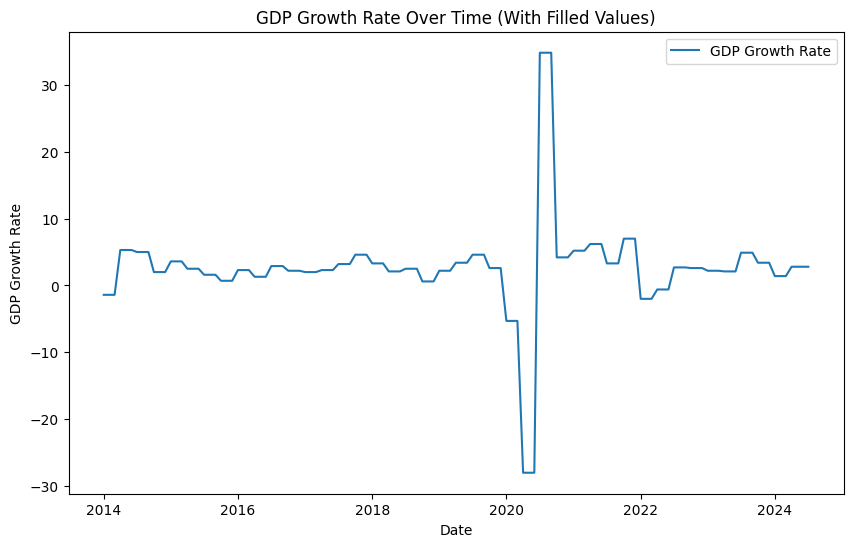

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(indicators['date'], indicators['GDP Growth Rate'], label='GDP Growth Rate')
plt.title('GDP Growth Rate Over Time (With Filled Values)')
plt.xlabel('Date')
plt.ylabel('GDP Growth Rate')
plt.legend()
plt.show()

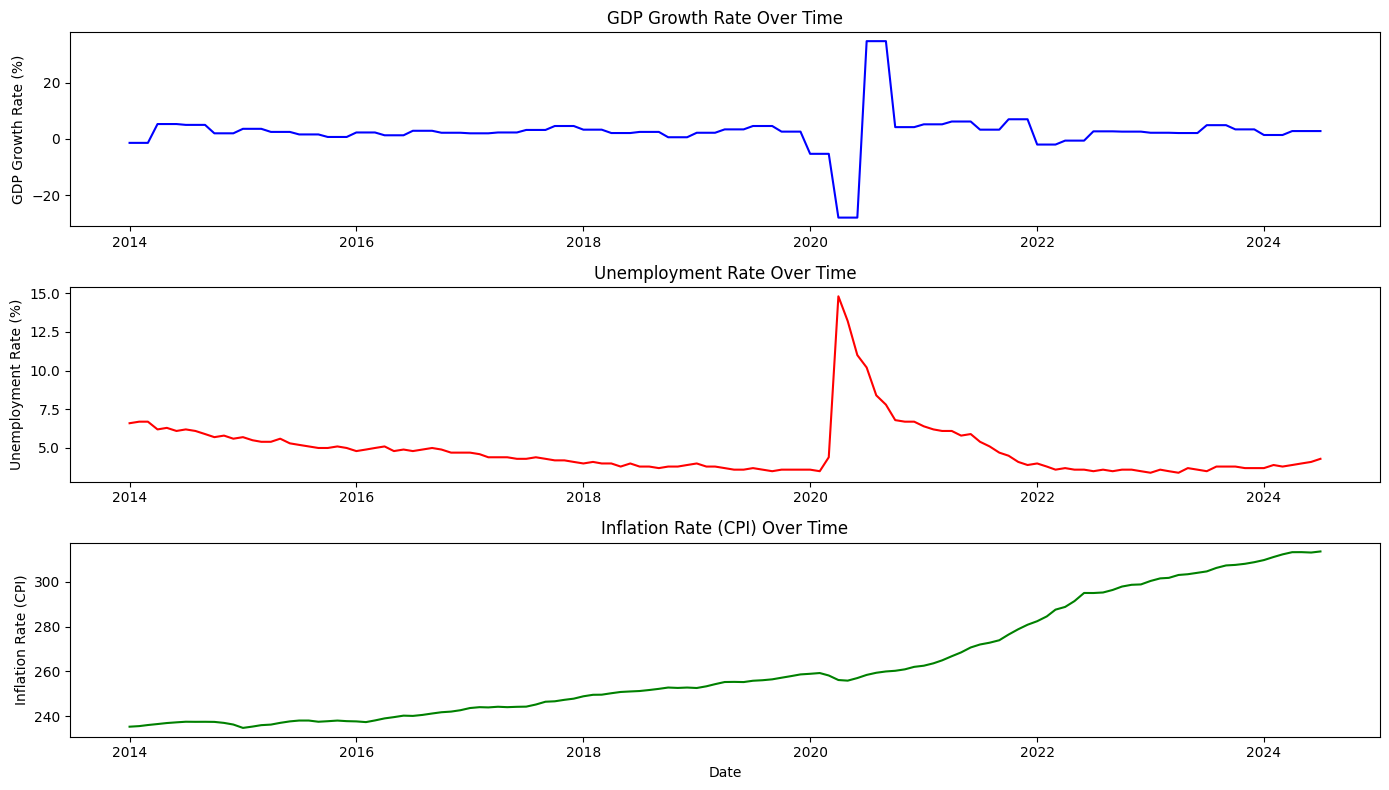

In [29]:
plt.figure(figsize=(14, 8))

# Plot GDP Growth Rate
plt.subplot(3, 1, 1)
plt.plot(indicators['date'], indicators['GDP Growth Rate'], color='blue')
plt.title('GDP Growth Rate Over Time')
plt.ylabel('GDP Growth Rate (%)')

# Plot Unemployment Rate
plt.subplot(3, 1, 2)
plt.plot(indicators['date'], indicators['Unemployment Rate'], color='red')
plt.title('Unemployment Rate Over Time')
plt.ylabel('Unemployment Rate (%)')

# Plot Inflation Rate
plt.subplot(3, 1, 3)
plt.plot(indicators['date'], indicators['Inflation Rate (CPI)'], color='green')
plt.title('Inflation Rate (CPI) Over Time')
plt.ylabel('Inflation Rate (CPI)')
plt.xlabel('Date')

plt.tight_layout()
plt.show()


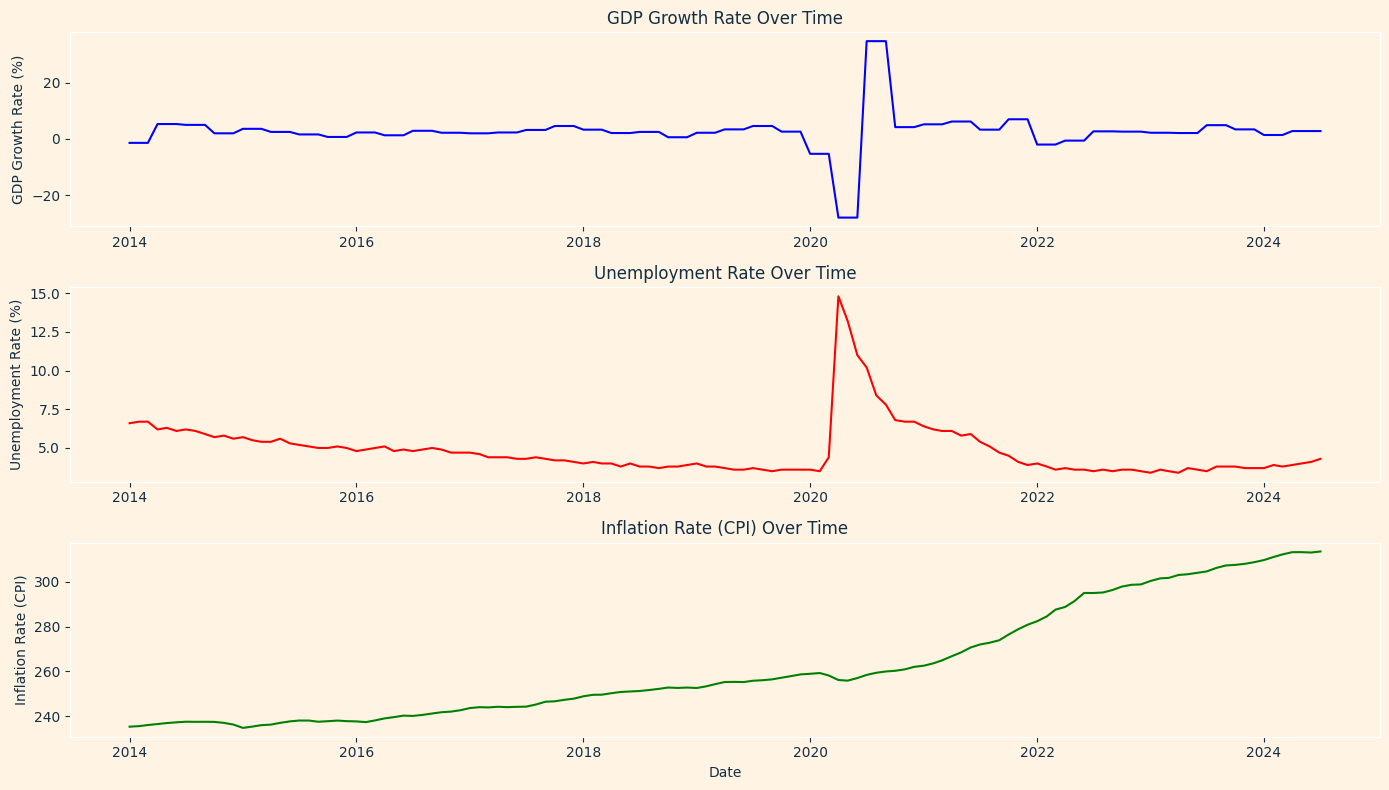

In [182]:
import matplotlib.pyplot as plt

# Set the background color and text color
plt.rcParams['figure.facecolor'] = '#fff4e4'  # Background color for the entire figure
plt.rcParams['axes.facecolor'] = '#fff4e4'  # Background color for the individual plots
plt.rcParams['text.color'] = '#132e43'  # Text color for titles and labels
plt.rcParams['axes.labelcolor'] = '#132e43'  # Label color for the axes
plt.rcParams['xtick.color'] = '#132e43'  # X-tick label color
plt.rcParams['ytick.color'] = '#132e43'  # Y-tick label color
plt.rcParams['axes.titlecolor'] = '#132e43'  # Title color

plt.figure(figsize=(14, 8))

# Plot GDP Growth Rate
plt.subplot(3, 1, 1)
plt.plot(indicators['date'], indicators['GDP Growth Rate'], color='blue')
plt.title('GDP Growth Rate Over Time')
plt.ylabel('GDP Growth Rate (%)')

# Plot Unemployment Rate
plt.subplot(3, 1, 2)
plt.plot(indicators['date'], indicators['Unemployment Rate'], color='red')
plt.title('Unemployment Rate Over Time')
plt.ylabel('Unemployment Rate (%)')

# Plot Inflation Rate
plt.subplot(3, 1, 3)
plt.plot(indicators['date'], indicators['Inflation Rate (CPI)'], color='green')
plt.title('Inflation Rate (CPI) Over Time')
plt.ylabel('Inflation Rate (CPI)')
plt.xlabel('Date')

plt.tight_layout()
plt.show()


In [30]:
correlation_matrix = indicators[['Unemployment Rate', 'Inflation Rate (CPI)', 'GDP Growth Rate']].corr()
print(correlation_matrix)

                      Unemployment Rate  Inflation Rate (CPI)  GDP Growth Rate
Unemployment Rate              1.000000             -0.326423        -0.196268
Inflation Rate (CPI)          -0.326423              1.000000         0.017865
GDP Growth Rate               -0.196268              0.017865         1.000000


In [31]:
print(indicators.head())
print(indicators.info())
print(indicators.describe())

        date  Unemployment Rate  Inflation Rate (CPI)  GDP Growth Rate
0 2014-01-01                6.6               235.288             -1.4
1 2014-02-01                6.7               235.547             -1.4
2 2014-03-01                6.7               236.028             -1.4
3 2014-04-01                6.2               236.468              5.3
4 2014-05-01                6.3               236.918              5.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  127 non-null    datetime64[ns]
 1   Unemployment Rate     127 non-null    float64       
 2   Inflation Rate (CPI)  127 non-null    float64       
 3   GDP Growth Rate       127 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.1 KB
None
                                date  Unemployment Rate  I

In [32]:
ud = indicators['date'].unique()
print(ud)


<DatetimeArray>
['2014-01-01 00:00:00', '2014-02-01 00:00:00', '2014-03-01 00:00:00',
 '2014-04-01 00:00:00', '2014-05-01 00:00:00', '2014-06-01 00:00:00',
 '2014-07-01 00:00:00', '2014-08-01 00:00:00', '2014-09-01 00:00:00',
 '2014-10-01 00:00:00',
 ...
 '2023-10-01 00:00:00', '2023-11-01 00:00:00', '2023-12-01 00:00:00',
 '2024-01-01 00:00:00', '2024-02-01 00:00:00', '2024-03-01 00:00:00',
 '2024-04-01 00:00:00', '2024-05-01 00:00:00', '2024-06-01 00:00:00',
 '2024-07-01 00:00:00']
Length: 127, dtype: datetime64[ns]


Installing yfinance

In [33]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [34]:
import yfinance as yf


In [35]:
tickers = ["TSLA", "NVDA"]


def fetch_fundamental_data (tickers):
    start_date = "2014-01-01"
    end_date = "2024-12-31"
    stock = yf.Ticker(tickers)

    info = stock.info

    
    pe_ratio = info.get('trailingPE')
    forward_pe = info.get('forwardPE')
    peg_ration = info.get('pegRatio')
    profit_margins = info.get('profitMargins')
    roa = info.get('returnOnAssets')
    roe = info.get('returnOnEquity')
    ebitda_margins = info.get('ebitdaMargins')
    operating_margins = info.get('operatingMargins')

    # Liquidity Ratios
    current_ratio = info.get('currentRatio')
    quick_ratio = info.get('quickRatio')

    # Leverage Ratios
    debt_to_equity = info.get('debtToEquity')
    total_debt = info.get('totalDebt')

    # Valuation Metrics
    market_cap = info.get('marketCap')
    enterprise_value = info.get('enterpriseValue')
    ps_ratio = info.get('priceToSalesTrailing12Months')
    pb_ratio = info.get('priceToBook')

    # Growth Metrics
    earnings_growth = info.get('earningsGrowth')
    revenue_growth = info.get('revenueGrowth')

    # Dividend Information
    dividend_yield = info.get('dividendYield')
    payout_ratio = info.get('payoutRatio')
    five_year_avg_dividend_yield = info.get('fiveYearAvgDividendYield')


    data = {
        'Profitability Ratios': {
            'P/E Ratio': pe_ratio,
            'Forward P/E': forward_pe,
            'Profit Margins': profit_margins,
            'ROA': roa,
            'ROE': roe,
            'EBITDA Margins': ebitda_margins,
            'Operating Margins': operating_margins
        },
        'Liquidity Ratios': {
            'Current Ratio': current_ratio,
            'Quick Ratio': quick_ratio
        },
        'Leverage Ratios': {
            'Debt to Equity': debt_to_equity,
            'Total Debt': total_debt
        },
        'Valuation Metrics': {
            'Market Cap': market_cap,
            'Enterprise Value': enterprise_value,
            'Price to Sales Ratio': ps_ratio,
            'Price to Book Ratio': pb_ratio
        },
        'Growth Metrics': {
            'Earnings Growth': earnings_growth,
            'Revenue Growth': revenue_growth
        },
        'Dividend Information': {
            'Dividend Yield': dividend_yield,
            'Payout Ratio': payout_ratio,
            'Five-Year Average Dividend Yield': five_year_avg_dividend_yield
        }
    }
    return data

In [36]:
import pandas as pd

# Initialize an empty list to store data
data_list = []

for ticker in tickers: 
    data = fetch_fundamental_data(ticker)
    # Create a DataFrame for each ticker and append it to the list
    data_list.append(pd.Series(data, name=ticker))

# Concatenate all Series objects in the list into a DataFrame
df = pd.concat(data_list, axis=1).T  # Transpose the DataFrame to get tickers as rows

print(df)


                                   Profitability Ratios  \
TSLA  {'P/E Ratio': 57.794945, 'Forward P/E': 65.317...   
NVDA  {'P/E Ratio': 58.69626, 'Forward P/E': 32.9685...   

                                    Liquidity Ratios  \
TSLA  {'Current Ratio': 1.911, 'Quick Ratio': 1.249}   
NVDA  {'Current Ratio': 3.529, 'Quick Ratio': 2.877}   

                                        Leverage Ratios  \
TSLA  {'Debt to Equity': 18.606, 'Total Debt': 12515...   
NVDA  {'Debt to Equity': 22.866, 'Total Debt': 11237...   

                                      Valuation Metrics  \
TSLA  {'Market Cap': 657297178624, 'Enterprise Value...   
NVDA  {'Market Cap': 3089792499712, 'Enterprise Valu...   

                                         Growth Metrics  \
TSLA  {'Earnings Growth': -0.462, 'Revenue Growth': ...   
NVDA  {'Earnings Growth': 6.5, 'Revenue Growth': 2.621}   

                                   Dividend Information  
TSLA  {'Dividend Yield': None, 'Payout Ratio': None,...  
NVD

Viewing the distribution of both stocks

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


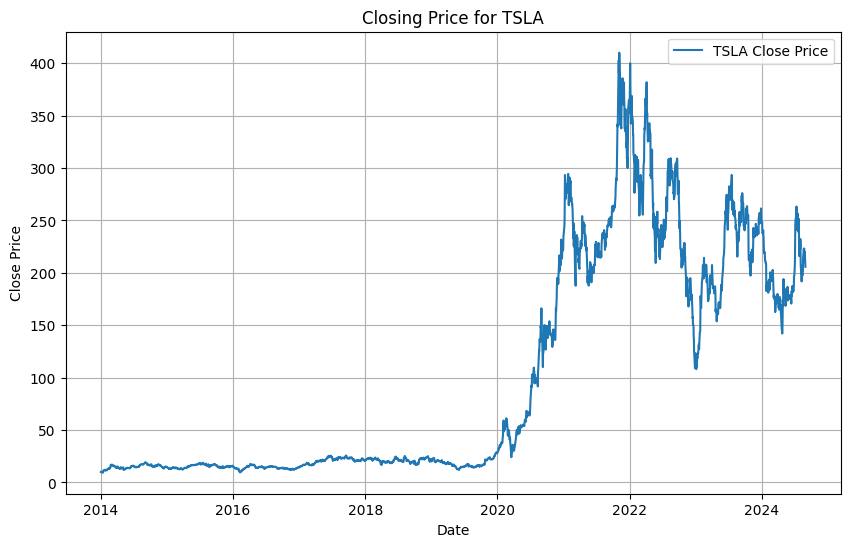

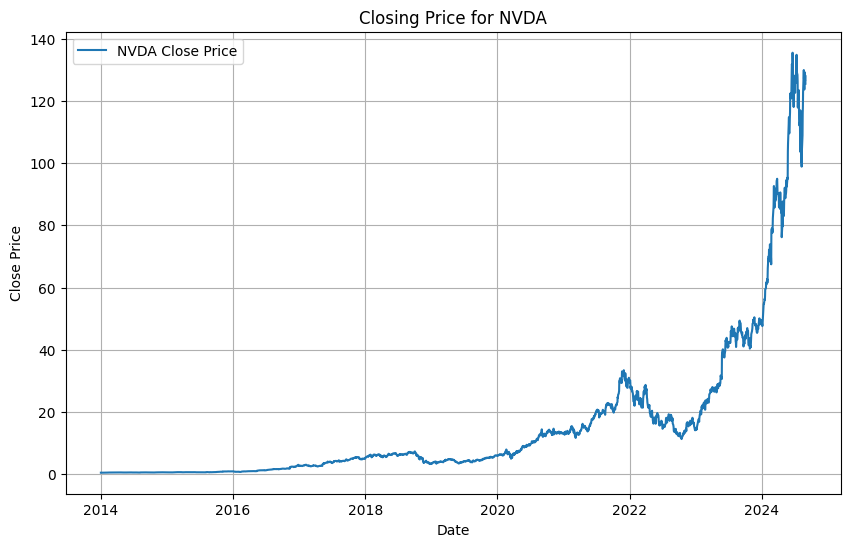

In [37]:
import matplotlib.pyplot as plt

data = pd.DataFrame()

# Fetch the data for each ticker
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['Ticker'] = ticker
    stock_data['Date'] = stock_data.index  # Add Date column
    data = pd.concat([data, stock_data], axis=0)

# Reset index for easy manipulation
data.reset_index(drop=True, inplace=True)

# Plot each ticker's close price  
for ticker in tickers:
    df_ticker = data[data['Ticker'] == ticker]  # Filter data for the current ticker
    plt.figure(figsize=(10, 6))
    plt.plot(df_ticker['Date'], df_ticker['Close'], label=f"{ticker} Close Price")
    plt.title(f"Closing Price for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


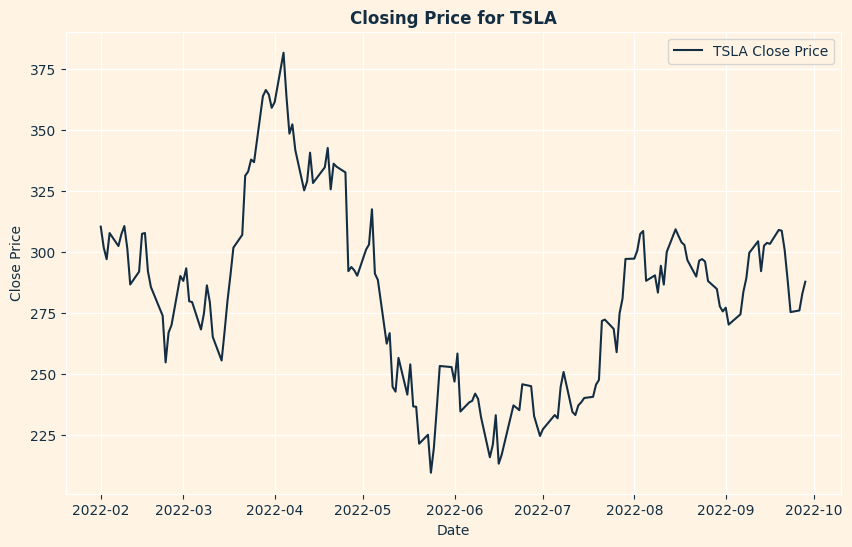

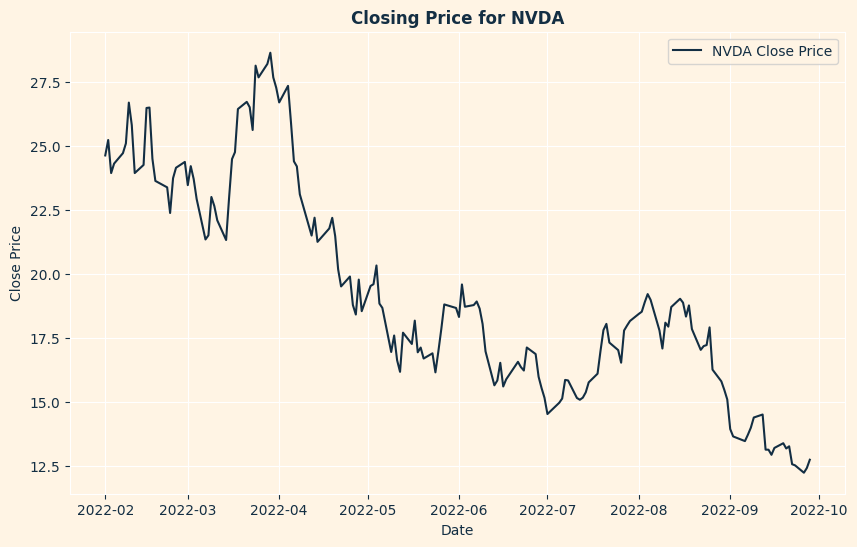

In [183]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Define the style settings for background color and text
plt.rcParams['figure.facecolor'] = '#fff4e4'  # Background color for the entire figure
plt.rcParams['axes.facecolor'] = '#fff4e4'  # Background color for the individual plots
plt.rcParams['text.color'] = '#132e43'  # Text color for titles and labels
plt.rcParams['axes.labelcolor'] = '#132e43'  # Label color for the axes
plt.rcParams['xtick.color'] = '#132e43'  # X-tick label color
plt.rcParams['ytick.color'] = '#132e43'  # Y-tick label color
plt.rcParams['axes.titlecolor'] = '#132e43'  # Title color
plt.rcParams['axes.titleweight'] = 'bold'  # Make all titles bold

data = pd.DataFrame()

# Fetch the data for each ticker
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['Ticker'] = ticker
    stock_data['Date'] = stock_data.index  # Add Date column
    data = pd.concat([data, stock_data], axis=0)

# Reset index for easy manipulation
data.reset_index(drop=True, inplace=True)

# Plot each ticker's close price  
for ticker in tickers:
    df_ticker = data[data['Ticker'] == ticker]  # Filter data for the current ticker
    plt.figure(figsize=(10, 6))
    plt.plot(df_ticker['Date'], df_ticker['Close'], label=f"{ticker} Close Price", color='#132e43')
    plt.title(f"Closing Price for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.legend()
    plt.show()


Merging Indicators & Stock Data

In [38]:
tickers = ['TSLA', 'NVDA']  # Example tickers
start_date = "2014-01-01"
end_date = "2024-12-31"

# Fetch the stock data
stock_data = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Ticker'] = ticker
    data['Date'] = data.index
    stock_data = pd.concat([stock_data, data], axis=0)

# Reset index
stock_data.reset_index(drop=True, inplace=True)

# Filter for just the Date, Ticker, and Close columns
stock_data = stock_data[['Date', 'Ticker', 'Close']]

# Convert 'Date' to datetime if it's not already
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [39]:
stock_data

,Date,Ticker,Close
0,2014-01-02,TSLA,10.006667
1,2014-01-03,TSLA,9.970667
2,2014-01-06,TSLA,9.800000
3,2014-01-07,TSLA,9.957333
4,2014-01-08,TSLA,10.085333
...,...,...,...
5359,2024-08-22,NVDA,123.739998
5360,2024-08-23,NVDA,129.369995
5361,2024-08-26,NVDA,126.459999
5362,2024-08-27,NVDA,128.300003


In [40]:

# Check for duplicates based on Date, Ticker, and Close columns
duplicates = stock_data[stock_data.duplicated(subset=['Date', 'Ticker', 'Close'], keep=False)]

# Display the duplicates
print(duplicates)

Empty DataFrame
Columns: [Date, Ticker, Close]
Index: []


In [41]:
s = stock_data['Date'].unique()
print(s)

<DatetimeArray>
['2014-01-02 00:00:00', '2014-01-03 00:00:00', '2014-01-06 00:00:00',
 '2014-01-07 00:00:00', '2014-01-08 00:00:00', '2014-01-09 00:00:00',
 '2014-01-10 00:00:00', '2014-01-13 00:00:00', '2014-01-14 00:00:00',
 '2014-01-15 00:00:00',
 ...
 '2024-08-15 00:00:00', '2024-08-16 00:00:00', '2024-08-19 00:00:00',
 '2024-08-20 00:00:00', '2024-08-21 00:00:00', '2024-08-22 00:00:00',
 '2024-08-23 00:00:00', '2024-08-26 00:00:00', '2024-08-27 00:00:00',
 '2024-08-28 00:00:00']
Length: 2682, dtype: datetime64[ns]


In [42]:
# Assuming 'indicators' is your indicators DataFrame and 'stock_data' is the stock closing price DataFrame

# Merge the indicators DataFrame with the stock data on 'date'
merged_data = pd.merge(indicators, stock_data, left_on='date', right_on='Date', how='outer')

# Drop the redundant 'Date' column after the merge
merged_data.drop(columns=['Date'], inplace=True)

# Forward fill and backward fill to handle missing values (NaNs)
merged_data.fillna(method='ffill', inplace=True)  # Forward fill
merged_data.fillna(method='bfill', inplace=True)  # Backward fill

# Ensure all date columns start and end on the same dates
start_date = merged_data['date'].min()
end_date = merged_data['date'].max()

# Filter the merged DataFrame to include only the dates within the valid range
merged_data =merged_data[(merged_data['date'] >= start_date) & (merged_data['date'] <= end_date)]

# Drop any remaining rows with NaNs (if needed)
merged_data.dropna(inplace=True)

# Print the final merged DataFrame
print(merged_data.head())


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\1761684882.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)  # Forward fill
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\1761684882.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='bfill', inplace=True)  # Backward fill


        date  Unemployment Rate  Inflation Rate (CPI)  GDP Growth Rate Ticker  \
0 2014-01-01                6.6               235.288             -1.4   TSLA   
1 2014-01-01                6.6               235.288             -1.4   TSLA   
2 2014-01-01                6.6               235.288             -1.4   NVDA   
3 2014-01-01                6.6               235.288             -1.4   TSLA   
4 2014-01-01                6.6               235.288             -1.4   NVDA   

       Close  
0  10.006667  
1  10.006667  
2   0.396500  
3   9.970667  
4   0.391750  


In [43]:
# Check for duplicates in the merged data based on 'date', 'Ticker', and 'Close'
duplicates_after_merge = merged_data[merged_data.duplicated(subset=['date', 'Ticker', 'Close'], keep=False)]

# Display the duplicates
print(duplicates_after_merge)


           date  Unemployment Rate  Inflation Rate (CPI)  GDP Growth Rate  \
0    2014-01-01                6.6               235.288             -1.4   
1    2014-01-01                6.6               235.288             -1.4   
34   2014-01-01                6.6               235.288             -1.4   
38   2014-01-01                6.6               235.288             -1.4   
82   2014-03-01                6.7               236.028             -1.4   
...         ...                ...                   ...              ...   
3916 2021-09-01                4.7               273.887              3.3   
3996 2021-11-01                4.1               278.799              7.0   
3998 2021-11-01                4.1               278.799              7.0   
5071 2023-12-01                3.7               308.742              3.4   
5073 2023-12-01                3.7               308.742              3.4   

     Ticker      Close  
0      TSLA  10.006667  
1      TSLA  10.006667  


In [44]:
# Identify duplicates based on date, Ticker, and Close
duplicates = merged_data[merged_data.duplicated(subset=['date', 'Ticker', 'Close'], keep=False)]


In [45]:
duplicates

,date,Unemployment Rate,Inflation Rate (CPI),GDP Growth Rate,Ticker,Close
0,2014-01-01,6.6,235.288,-1.4,TSLA,10.006667
1,2014-01-01,6.6,235.288,-1.4,TSLA,10.006667
34,2014-01-01,6.6,235.288,-1.4,NVDA,0.386500
38,2014-01-01,6.6,235.288,-1.4,NVDA,0.386500
82,2014-03-01,6.7,236.028,-1.4,NVDA,0.459500
...,...,...,...,...,...,...
3916,2021-09-01,4.7,273.887,3.3,NVDA,22.242001
3996,2021-11-01,4.1,278.799,7.0,NVDA,30.389999
3998,2021-11-01,4.1,278.799,7.0,NVDA,30.389999
5071,2023-12-01,3.7,308.742,3.4,NVDA,49.521999


In [46]:
merged_data_cleaned = merged_data.drop_duplicates(subset=['date', 'Ticker', 'Close'])


In [47]:
merged_data_cleaned

,date,Unemployment Rate,Inflation Rate (CPI),GDP Growth Rate,Ticker,Close
0,2014-01-01,6.6,235.288,-1.4,TSLA,10.006667
2,2014-01-01,6.6,235.288,-1.4,NVDA,0.396500
3,2014-01-01,6.6,235.288,-1.4,TSLA,9.970667
4,2014-01-01,6.6,235.288,-1.4,NVDA,0.391750
5,2014-01-01,6.6,235.288,-1.4,TSLA,9.800000
...,...,...,...,...,...,...
5403,2024-07-01,4.3,313.534,2.8,NVDA,126.459999
5404,2024-07-01,4.3,313.534,2.8,TSLA,209.210007
5405,2024-07-01,4.3,313.534,2.8,NVDA,128.300003
5406,2024-07-01,4.3,313.534,2.8,TSLA,205.750000


In [48]:
# Verify no duplicates remain
duplicates_check = merged_data_cleaned[merged_data_cleaned.duplicated(subset=['date', 'Ticker', 'Close'], keep=False)]
print(duplicates_check)

Empty DataFrame
Columns: [date, Unemployment Rate, Inflation Rate (CPI), GDP Growth Rate, Ticker, Close]
Index: []


In [49]:

# Calculate the correlation matrix
correlation_matrix = merged_data_cleaned[['Unemployment Rate', 'Inflation Rate (CPI)', 'GDP Growth Rate', 'Close']].corr()

# Display the correlation matrix
print(correlation_matrix)

                      Unemployment Rate  Inflation Rate (CPI)  \
Unemployment Rate              1.000000             -0.323810   
Inflation Rate (CPI)          -0.323810              1.000000   
GDP Growth Rate               -0.186403              0.017730   
Close                         -0.120659              0.598309   

                      GDP Growth Rate     Close  
Unemployment Rate           -0.186403 -0.120659  
Inflation Rate (CPI)         0.017730  0.598309  
GDP Growth Rate              1.000000  0.067133  
Close                        0.067133  1.000000  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\1715571529.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['Close_MA'] = merged_data_cleaned['Close'].rolling(window=30).mean()


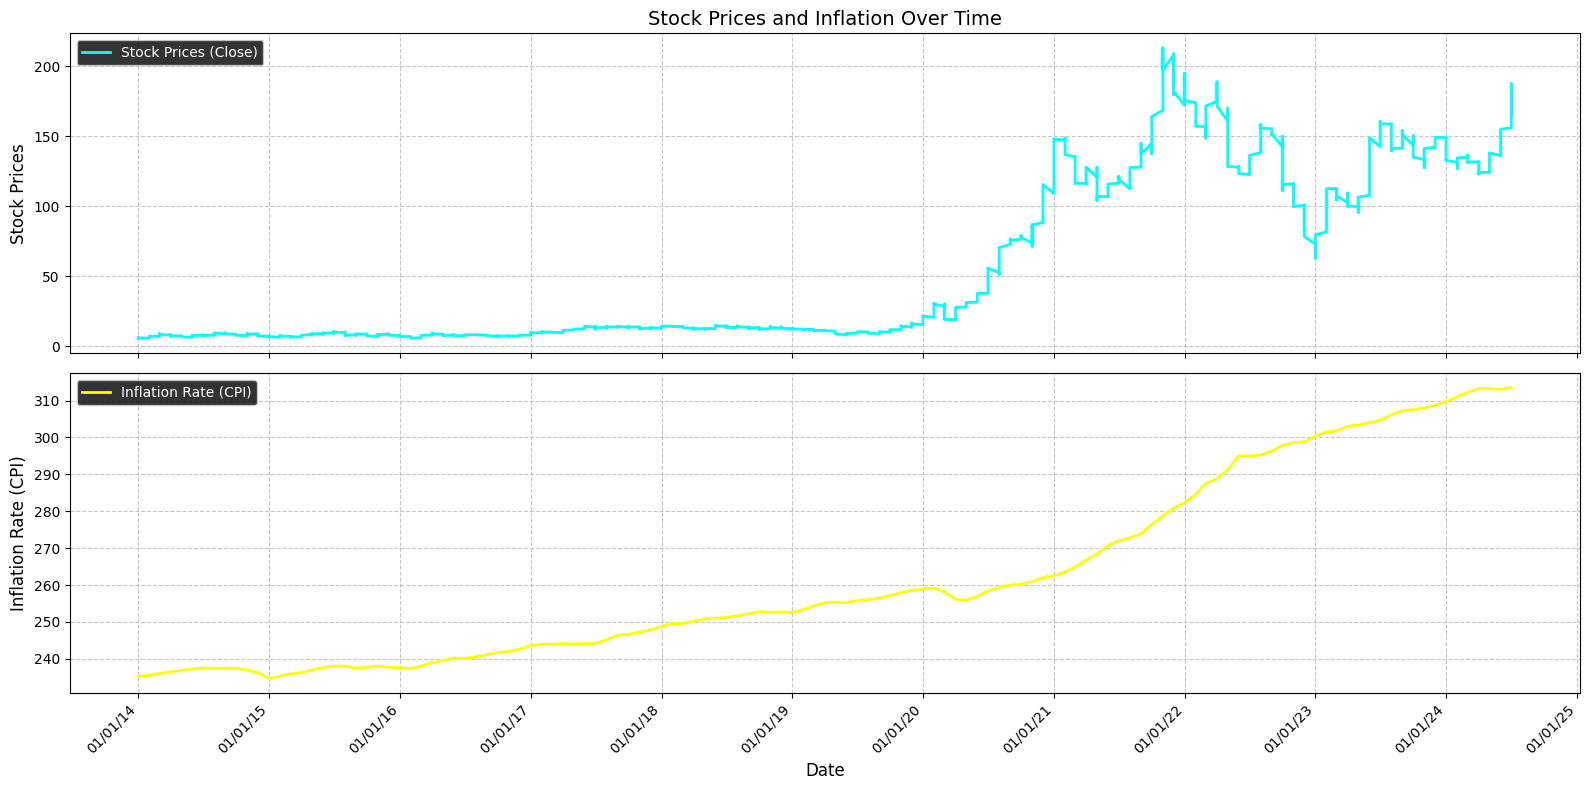

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming merged_data_cleaned is your final cleaned DataFrame with 'date', 'Close', and 'Inflation Rate (CPI)' columns.

# Calculate a moving average for the stock prices to smooth the line
merged_data_cleaned['Close_MA'] = merged_data_cleaned['Close'].rolling(window=30).mean()

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# Set a dark background
plt.style.use('dark_background')

# Plot the smoothed stock prices on the first subplot
ax1.plot(merged_data_cleaned['date'], merged_data_cleaned['Close_MA'], color='cyan', label='Stock Prices (Close)', linewidth=2)
ax1.set_ylabel('Stock Prices', fontsize=12)
ax1.set_title('Stock Prices and Inflation Over Time', fontsize=14)

# Customize the first subplot
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='upper left', fontsize=10)

# Plot inflation on the second subplot
ax2.plot(merged_data_cleaned['date'], merged_data_cleaned['Inflation Rate (CPI)'], color='yellow', label='Inflation Rate (CPI)', linewidth=2)
ax2.set_ylabel('Inflation Rate (CPI)', fontsize=12)

# Customize the second subplot
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='upper left', fontsize=10)

# Set the x-axis format
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax2.xaxis.set_major_locator(mdates.YearLocator())

# Add titles and labels similar to the example image
ax2.set_xlabel('Date', fontsize=12)

# Rotate the x-axis labels for better readability
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Save the plot with high resolution
plt.savefig('enhanced_stock_vs_inflation.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\4233597229.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['Close_MA'] = merged_data_cleaned['Close'].rolling(window=30).mean()


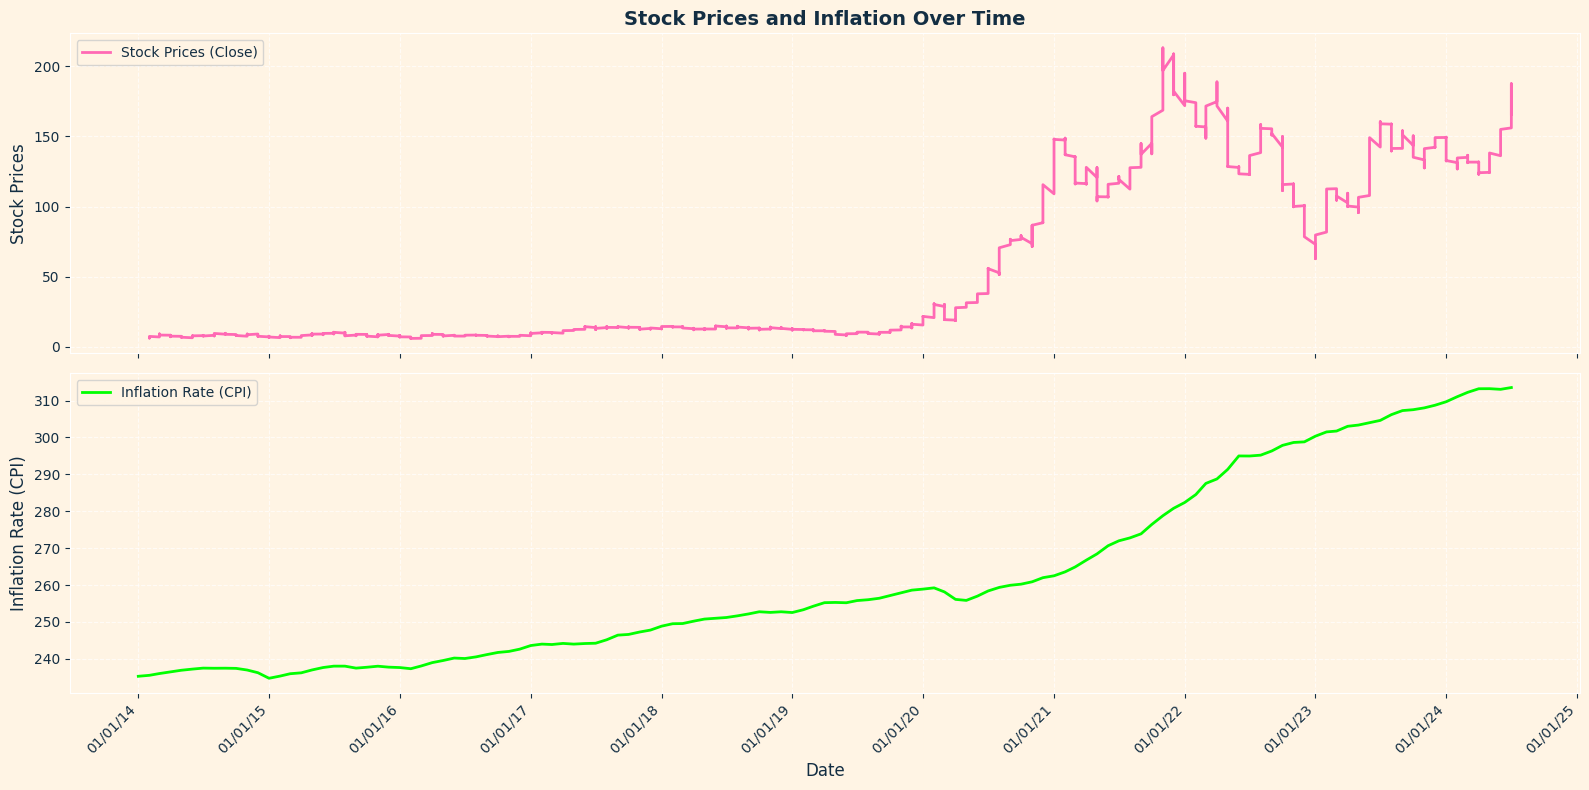

In [187]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming merged_data_cleaned is your final cleaned DataFrame with 'date', 'Close', and 'Inflation Rate (CPI)' columns.

# Calculate a moving average for the stock prices to smooth the line
merged_data_cleaned['Close_MA'] = merged_data_cleaned['Close'].rolling(window=30).mean()

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# Set the background color and text style
plt.rcParams['figure.facecolor'] = '#fff4e4'  # Background color for the entire figure
plt.rcParams['axes.facecolor'] = '#fff4e4'  # Background color for the individual plots
plt.rcParams['text.color'] = '#132e43'  # Text color for titles and labels
plt.rcParams['axes.labelcolor'] = '#132e43'  # Label color for the axes
plt.rcParams['xtick.color'] = '#132e43'  # X-tick label color
plt.rcParams['ytick.color'] = '#132e43'  # Y-tick label color
plt.rcParams['axes.titlecolor'] = '#132e43'  # Title color
plt.rcParams['axes.titleweight'] = 'bold'  # Make all titles bold

# Plot the smoothed stock prices on the first subplot
ax1.plot(merged_data_cleaned['date'], merged_data_cleaned['Close_MA'], color='hotpink', label='Stock Prices (Close)', linewidth=2)
ax1.set_ylabel('Stock Prices', fontsize=12)
ax1.set_title('Stock Prices and Inflation Over Time', fontsize=14)

# Customize the first subplot
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='upper left', fontsize=10)

# Plot inflation on the second subplot
ax2.plot(merged_data_cleaned['date'], merged_data_cleaned['Inflation Rate (CPI)'], color='lime', label='Inflation Rate (CPI)', linewidth=2)  # Neon green line
ax2.set_ylabel('Inflation Rate (CPI)', fontsize=12)

# Customize the second subplot
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='upper left', fontsize=10)

# Set the x-axis format
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax2.xaxis.set_major_locator(mdates.YearLocator())

# Add titles and labels similar to the example image
ax2.set_xlabel('Date', fontsize=12)

# Rotate the x-axis labels for better readability
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Save the plot with high resolution
plt.savefig('enhanced_stock_vs_inflation.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\521159782.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['Close_MA'] = merged_data_cleaned['Close'].rolling(window=30).mean()


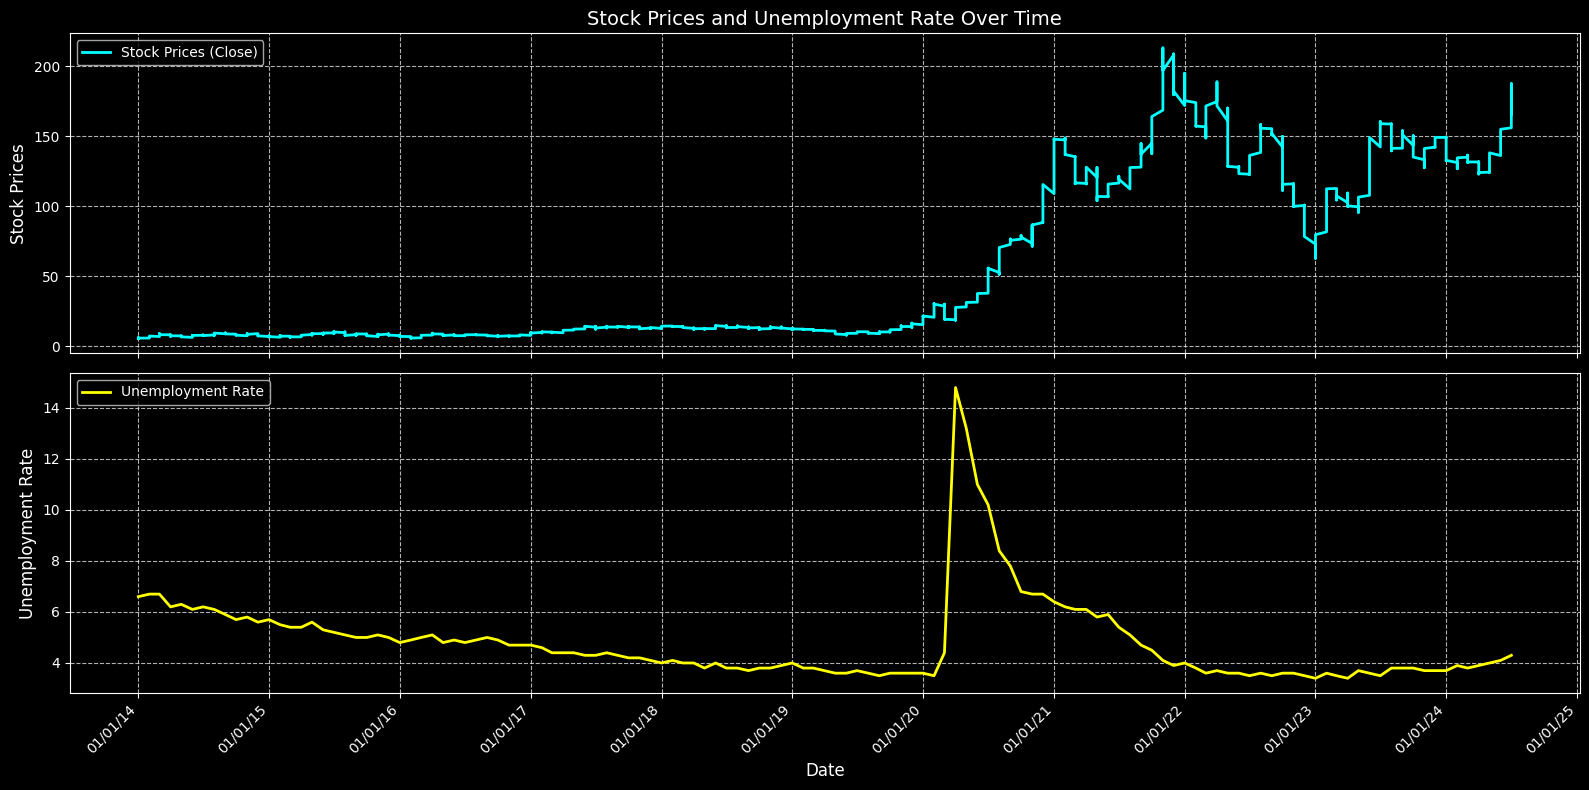

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming merged_data_cleaned is your final cleaned DataFrame with 'date', 'Close', and 'Inflation Rate (CPI)' columns.

# Calculate a moving average for the stock prices to smooth the line
merged_data_cleaned['Close_MA'] = merged_data_cleaned['Close'].rolling(window=30).mean()

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# Set a dark background
plt.style.use('dark_background')

# Plot the smoothed stock prices on the first subplot
ax1.plot(merged_data_cleaned['date'], merged_data_cleaned['Close_MA'], color='cyan', label='Stock Prices (Close)', linewidth=2)
ax1.set_ylabel('Stock Prices', fontsize=12)
ax1.set_title('Stock Prices and Unemployment Rate Over Time', fontsize=14)

# Customize the first subplot
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='upper left', fontsize=10)

# Plot inflation on the second subplot
ax2.plot(merged_data_cleaned['date'], merged_data_cleaned['Unemployment Rate'], color='yellow', label='Unemployment Rate', linewidth=2)
ax2.set_ylabel('Unemployment Rate', fontsize=12)

# Customize the second subplot
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='upper left', fontsize=10)

# Set the x-axis format
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax2.xaxis.set_major_locator(mdates.YearLocator())

# Add titles and labels similar to the example image
ax2.set_xlabel('Date', fontsize=12)

# Rotate the x-axis labels for better readability
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Save the plot with high resolution
plt.savefig('enhanced_stock_vs_unemployment.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\921166775.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['Close_MA'] = merged_data_cleaned['Close'].rolling(window=30).mean()


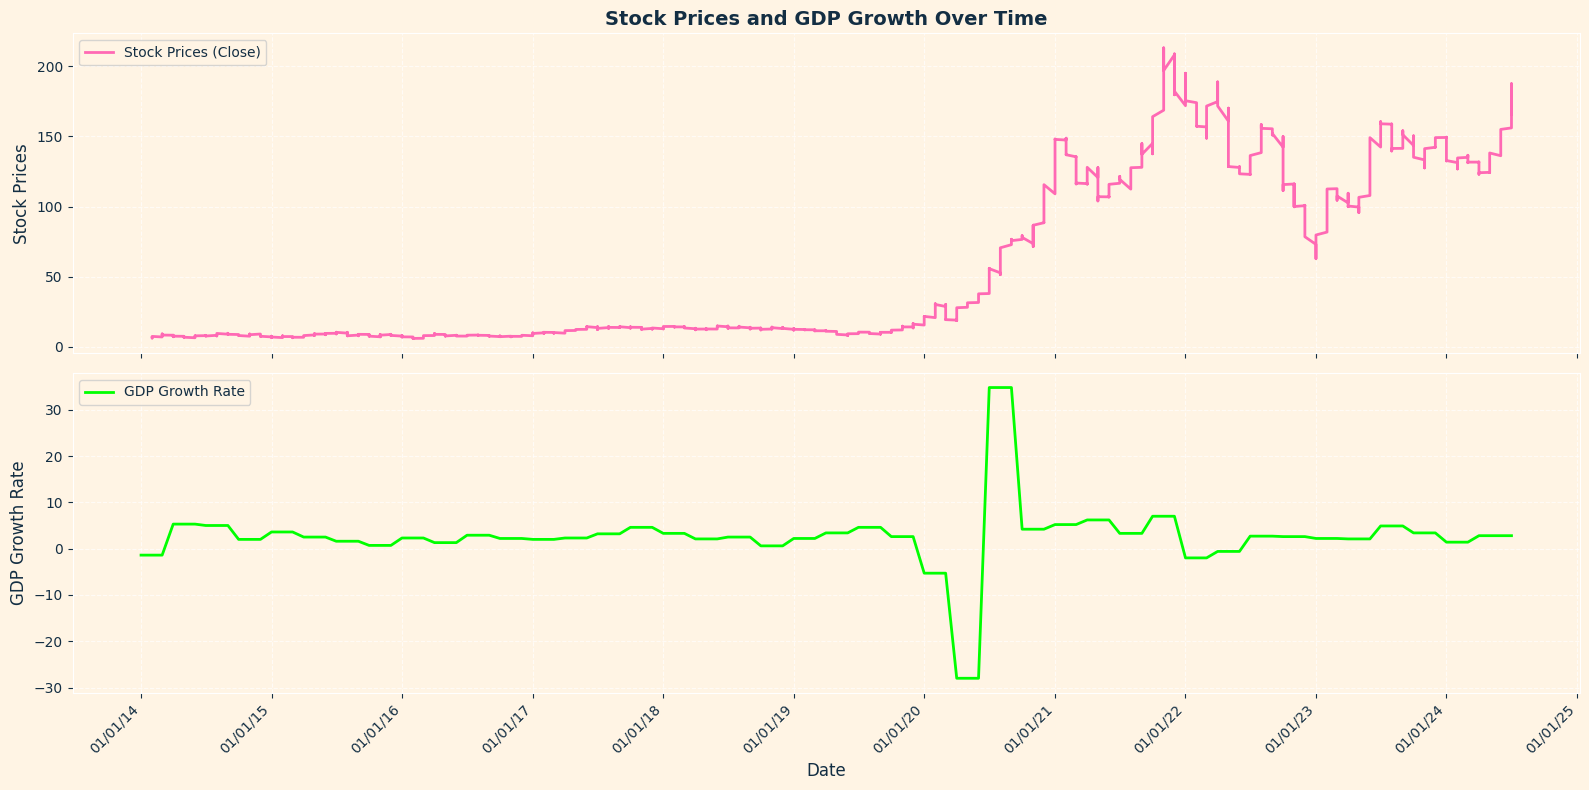

In [192]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming merged_data_cleaned is your final cleaned DataFrame with 'date', 'Close', and 'Unemployment Rate' columns.

# Calculate a moving average for the stock prices to smooth the line
merged_data_cleaned['Close_MA'] = merged_data_cleaned['Close'].rolling(window=30).mean()

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# Set the background color and text style to off-white and dark blue
plt.rcParams['figure.facecolor'] = '#fff4e4'  # Background color for the entire figure
plt.rcParams['axes.facecolor'] = '#fff4e4'  # Background color for the individual plots
plt.rcParams['text.color'] = '#132e43'  # Text color for titles and labels
plt.rcParams['axes.labelcolor'] = '#132e43'  # Label color for the axes
plt.rcParams['xtick.color'] = '#132e43'  # X-tick label color
plt.rcParams['ytick.color'] = '#132e43'  # Y-tick label color
plt.rcParams['axes.titlecolor'] = '#132e43'  # Title color
plt.rcParams['axes.titleweight'] = 'bold'  # Make all titles bold

# Plot the smoothed stock prices on the first subplot
ax1.plot(merged_data_cleaned['date'], merged_data_cleaned['Close_MA'], color='hotpink', label='Stock Prices (Close)', linewidth=2)
ax1.set_ylabel('Stock Prices', fontsize=12)
ax1.set_title('Stock Prices and GDP Growth Over Time', fontsize=14)

# Customize the first subplot
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='upper left', fontsize=10)

# Plot unemployment rate on the second subplot
ax2.plot(merged_data_cleaned['date'], merged_data_cleaned['GDP Growth Rate'], color='lime', label='GDP Growth Rate', linewidth=2)  # Neon green line
ax2.set_ylabel('GDP Growth Rate', fontsize=12)

# Customize the second subplot
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='upper left', fontsize=10)

# Set the x-axis format
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax2.xaxis.set_major_locator(mdates.YearLocator())

# Add titles and labels similar to the example image
ax2.set_xlabel('Date', fontsize=12)

# Rotate the x-axis labels for better readability
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Save the plot with high resolution
plt.savefig('enhanced_stock_vs_gdp.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


Polynomial Regression

In [53]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [54]:
# Assuming merged_data_cleaned is your DataFrame with columns: 'date', 'Close', 'Unemployment Rate', 'GDP Growth Rate', 'Inflation Rate (CPI)'

# Create lagged features for stock prices and other variables (e.g., 1-day, 7-day, 30-day lags)
merged_data_cleaned['Close_lag_1'] = merged_data_cleaned['Close'].shift(1)
merged_data_cleaned['Close_lag_7'] = merged_data_cleaned['Close'].shift(7)
merged_data_cleaned['Inflation_lag_1'] = merged_data_cleaned['Inflation Rate (CPI)'].shift(1)
merged_data_cleaned['Unemployment_lag_7'] = merged_data_cleaned['Unemployment Rate'].shift(7)
merged_data_cleaned['GDP_Growth_lag_30'] = merged_data_cleaned['GDP Growth Rate'].shift(30)

# Drop rows with NaN values created by the lag
merged_data_cleaned.dropna(inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\4285000490.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['Close_lag_1'] = merged_data_cleaned['Close'].shift(1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\4285000490.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['Close_lag_7'] = merged_data_cleaned['Close'].shift(7)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\4285000490.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [55]:
features = merged_data_cleaned[['Close_lag_1', 'Close_lag_7', 'Inflation Rate (CPI)', 'Inflation_lag_1', 'Unemployment Rate', 'Unemployment_lag_7', 'GDP Growth Rate', 'GDP_Growth_lag_30']]
target = merged_data_cleaned['Close']


In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Select the top 5 features
rfe = rfe.fit(features, target)

# Print selected features
print("Selected features:", features.columns[rfe.support_])


Selected features: Index(['Inflation Rate (CPI)', 'Inflation_lag_1', 'Unemployment Rate',
       'Unemployment_lag_7', 'GDP_Growth_lag_30'],
      dtype='object')


In [57]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model (e.g., Random Forest)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Root Mean Squared Error (RMSE): 11.040485222739553
R² Score: 0.9850462658553245


In [58]:
importances = model.feature_importances_
feature_names = features.columns
sorted_indices = np.argsort(importances)[::-1]

print("Feature Importance Rankings:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]}")


Feature Importance Rankings:
Close_lag_1: 0.4460475241627883
Inflation_lag_1: 0.30495295690633534
Inflation Rate (CPI): 0.19735362109694832
Unemployment_lag_7: 0.013159991758590579
Unemployment Rate: 0.010409599159232974
Close_lag_7: 0.010194502608052873
GDP_Growth_lag_30: 0.009496484160567233
GDP Growth Rate: 0.008385320147484209


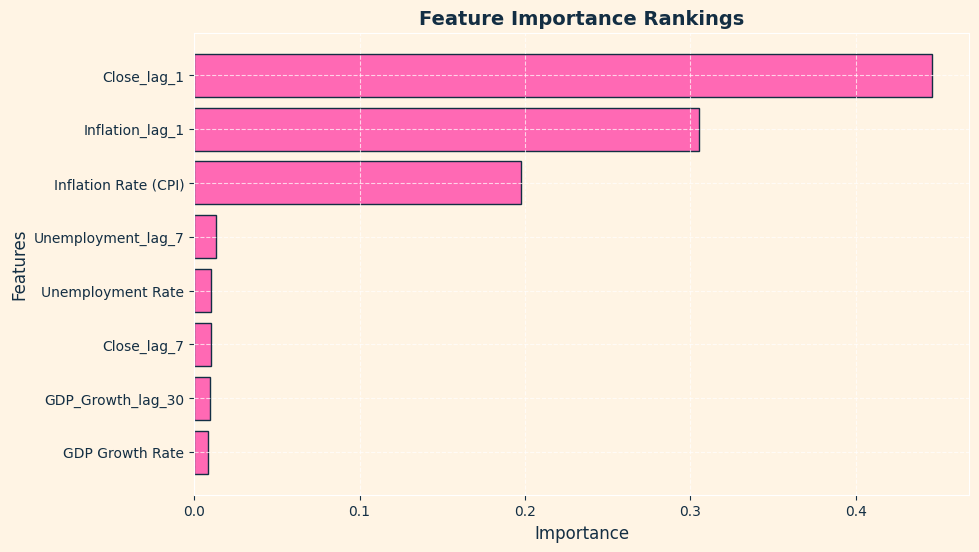

In [195]:
import matplotlib.pyplot as plt

# Feature importance data
features = [
    'Close_lag_1', 'Inflation_lag_1', 'Inflation Rate (CPI)', 
    'Unemployment_lag_7', 'Unemployment Rate', 
    'Close_lag_7', 'GDP_Growth_lag_30', 'GDP Growth Rate'
]
importances = [
    0.4460475241627883, 0.30495295690633534, 0.19735362109694832, 
    0.013159991758590579, 0.010409599159232974, 
    0.010194502608052873, 0.009496484160567233, 0.008385320147484209
]

# Sort the features by importance
sorted_indices = list(range(len(importances)))
sorted_indices.sort(key=lambda i: importances[i])

sorted_features = [features[i] for i in sorted_indices]
sorted_importances = [importances[i] for i in sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='hotpink', edgecolor='#132e43')
plt.xlabel('Importance', fontsize=12, color='#132e43')
plt.ylabel('Features', fontsize=12, color='#132e43')
plt.title('Feature Importance Rankings', fontsize=14, fontweight='bold', color='#132e43')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


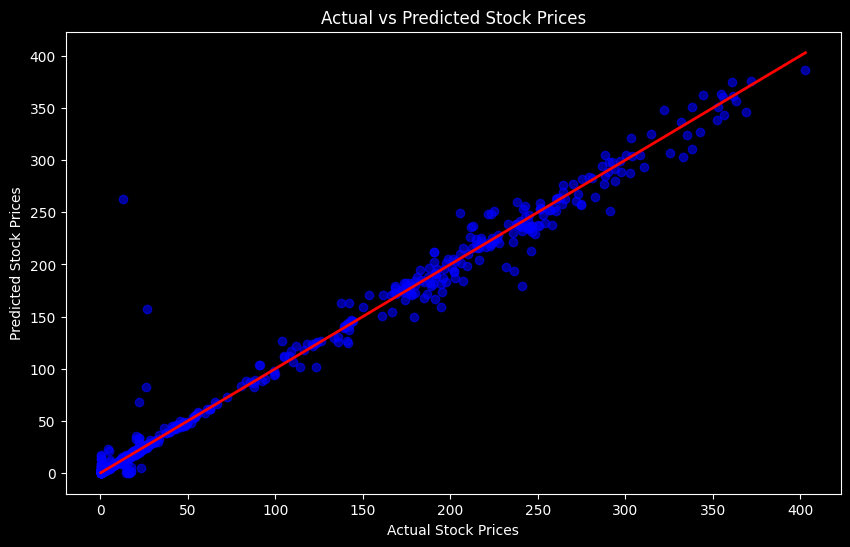

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # 45-degree line
plt.xlabel('Actual Stock Prices')
plt.ylabel('Predicted Stock Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.show()

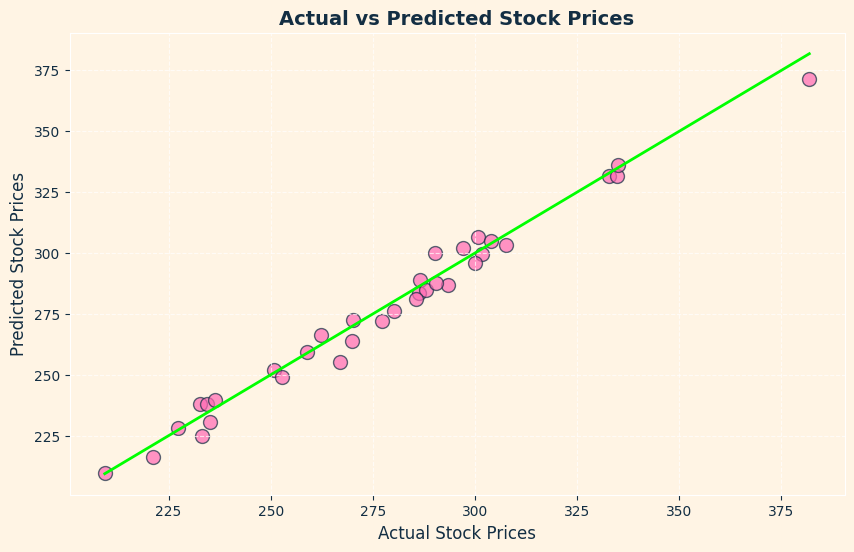

In [196]:
import matplotlib.pyplot as plt

# Adjusting the design as per the color theme
plt.figure(figsize=(10, 6))

# Scatter plot for Predicted vs Actual values
plt.scatter(y_test, y_pred, color='hotpink', edgecolor='#132e43', alpha=0.7, s=100)

# Adding a diagonal line (y = x) to indicate perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='lime', linewidth=2)

# Adding titles and labels with the specified style
plt.title('Actual vs Predicted Stock Prices', fontsize=14, fontweight='bold', color='#132e43')
plt.xlabel('Actual Stock Prices', fontsize=12, color='#132e43')
plt.ylabel('Predicted Stock Prices', fontsize=12, color='#132e43')

# Adding gridlines with the specified style
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [60]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

print("Feature Importance Rankings:")
for i in sorted_indices:
    print(f"{features.columns[i]}: {importances[i]}")

Feature Importance Rankings:
Close_lag_1: 0.4460475241627883
Inflation_lag_1: 0.30495295690633534
Inflation Rate (CPI): 0.19735362109694832
Unemployment_lag_7: 0.013159991758590579
Unemployment Rate: 0.010409599159232974
Close_lag_7: 0.010194502608052873
GDP_Growth_lag_30: 0.009496484160567233
GDP Growth Rate: 0.008385320147484209


Importing Tweet Data

In [61]:
import csv

In [62]:
tweet = pd.read_csv('Tweet.csv')
company = pd.read_csv('Company.csv')
company_tweet = pd.read_csv('Company_Tweet.csv')

In [63]:
company_tweet

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL
...,...,...
4336440,1212158772015034369,TSLA
4336441,1212159099632267268,TSLA
4336442,1212159184931717120,TSLA
4336443,1212159838882533376,TSLA


In [64]:
tweet['post_date'] = pd.to_datetime(tweet['post_date'], unit='s')
tweet['post_date'] = tweet['post_date'].dt.date

In [65]:
tweet

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,2015-01-01,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,2015-01-01,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,2015-01-01,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
3717959,1212159765914079234,TEEELAZER,2019-12-31,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717960,1212159838882533376,ShortingIsFun,2019-12-31,In 2020 I may start Tweeting out positive news...,0,0,1
3717961,1212160015332728833,Commuternyc,2019-12-31,Patiently Waiting for the no twitter sitter tw...,0,0,5
3717962,1212160410692046849,MoriaCrypto,2019-12-31,I don't discriminate. I own both $aapl and $ms...,1,0,1


Merge the DataFrames on tweet_id:

In [66]:
merged_tweets = pd.merge(tweet, company_tweet, on='tweet_id', how='inner')


In [67]:
print(merged_tweets.head())

             tweet_id           writer   post_date  \
0  550441509175443456  VisualStockRSRC  2015-01-01   
1  550441672312512512      KeralaGuy77  2015-01-01   
2  550441732014223360      DozenStocks  2015-01-01   
3  550442977802207232     ShowDreamCar  2015-01-01   
4  550443807834402816     i_Know_First  2015-01-01   

                                                body  comment_num  \
0  lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1  Insanity of today weirdo massive selling. $aap...            0   
2  S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4  Swing Trading: Up To 8.91% Return In 14 Days h...            0   

   retweet_num  like_num ticker_symbol  
0            0         1          AAPL  
1            0         0          AAPL  
2            0         0          AMZN  
3            0         1          TSLA  
4            0         1          AAPL  


In [68]:
merged_tweets

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,2015-01-01,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,2015-01-01,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,2015-01-01,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL
...,...,...,...,...,...,...,...,...
4336440,1212159838882533376,ShortingIsFun,2019-12-31,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA
4336441,1212160015332728833,Commuternyc,2019-12-31,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA
4336442,1212160410692046849,MoriaCrypto,2019-12-31,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL
4336443,1212160410692046849,MoriaCrypto,2019-12-31,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT


In [69]:
tweets_data = merged_tweets[merged_tweets['ticker_symbol'].isin(['AAPL', 'TSLA'])]

In [70]:
tweets_data

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,2015-01-01,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
3,550442977802207232,ShowDreamCar,2015-01-01,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL
5,550443807834402816,i_Know_First,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA
...,...,...,...,...,...,...,...,...
4336439,1212159765914079234,TEEELAZER,2019-12-31,That $SPY $SPX puuump in the last hour was the...,1,0,6,AAPL
4336440,1212159838882533376,ShortingIsFun,2019-12-31,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA
4336441,1212160015332728833,Commuternyc,2019-12-31,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA
4336442,1212160410692046849,MoriaCrypto,2019-12-31,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL


In [71]:
tweets_data = tweets_data[['post_date', 'body', 'ticker_symbol']]


In [72]:
tweets_data

,post_date,body,ticker_symbol
0,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! htt...",AAPL
1,2015-01-01,Insanity of today weirdo massive selling. $aap...,AAPL
3,2015-01-01,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,TSLA
4,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL
5,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,TSLA
...,...,...,...
4336439,2019-12-31,That $SPY $SPX puuump in the last hour was the...,AAPL
4336440,2019-12-31,In 2020 I may start Tweeting out positive news...,TSLA
4336441,2019-12-31,Patiently Waiting for the no twitter sitter tw...,TSLA
4336442,2019-12-31,I don't discriminate. I own both $aapl and $ms...,AAPL


Performing Sentiment Analysis

In [73]:
from transformers import AutoTokenizer, RobertaForSequenceClassification
import torch

c:\Users\Lenovo\anaconda3\envs\huggingface\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lenovo\anaconda3\envs\huggingface\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lenovo\anaconda3\envs\huggingface\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)


In [74]:
pip install flax

Note: you may need to restart the kernel to use updated packages.


In [75]:
sentiment = pd.read_csv('TSLA_tweets_sentiment_analysis.csv')
stocks = pd.read_csv('stock_yfinance_data.csv')

In [76]:
sentiment

,Date,Tweet,Stock Name,Company Name,sentiment
0,2022-08-01,Looks like existing Superchargers will remain ...,TSLA,"Tesla, Inc.",anger
1,2022-08-01,NEWS: Adam Jonas has released a new $TSLA note...,TSLA,"Tesla, Inc.",anger
2,2022-08-01,$TSLA avg 2-year forward P/E is 89x. At its cu...,TSLA,"Tesla, Inc.",optimism
3,2022-08-01,There is no way $TSLA should trade at 37x my e...,TSLA,"Tesla, Inc.",anger
4,2022-08-01,Been buying more $tsla. Anyone else ?,TSLA,"Tesla, Inc.",optimism
...,...,...,...,...,...
12101,2022-04-01,4/1/22 Watchlist🤑\n\n$UBER 35c &gt; $34.5\n$TS...,TSLA,"Tesla, Inc.",anger
12102,2022-04-01,@dlynnwatson @Tesla How’d I do Danielle? 🙃 htt...,TSLA,"Tesla, Inc.",optimism
12103,2022-04-01,Trade plan for #LottoFriday ✅\n\n$SPX failed a...,TSLA,"Tesla, Inc.",sadness
12104,2022-04-01,Cathie Wood’s @ARKInvest sold more than 36k sh...,TSLA,"Tesla, Inc.",optimism


In [77]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks['Date'] = stocks['Date'].dt.date

In [78]:
start_date = pd.to_datetime('2022-04-01').date()
end_date = pd.to_datetime('2022-08-01').date()

stocks_data = stocks[(stocks['Stock Name'].isin(['TSLA'])) &(stocks['Date'] >= start_date) & 
                       (stocks['Date'] <= end_date)] 


In [79]:
stocks_data

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
127,2022-04-01,360.383331,364.916656,355.546661,361.529999,361.529999,54263100,TSLA
128,2022-04-04,363.126678,383.303345,357.510010,381.816681,381.816681,82035900,TSLA
129,2022-04-05,378.766663,384.290009,362.433319,363.753326,363.753326,80075100,TSLA
130,2022-04-06,357.823334,359.666656,342.566681,348.586670,348.586670,89348400,TSLA
131,2022-04-07,350.796661,358.863342,340.513336,352.420013,352.420013,79447200,TSLA
...,...,...,...,...,...,...,...,...
205,2022-07-26,266.513336,267.309998,256.263336,258.859985,258.859985,66820800,TSLA
206,2022-07-27,263.809998,275.926666,261.790009,274.820007,274.820007,88110000,TSLA
207,2022-07-28,280.066681,283.299988,272.799988,280.899994,280.899994,84723000,TSLA
208,2022-07-29,280.700012,298.320007,279.100006,297.149994,297.149994,95313000,TSLA


In [80]:
# Mapping sentiment labels to numerical scores 
sentiment_mapping = {'anger': -1, 'sadness': -1, 'neutral': 0, 'optimism': 1}

# Apply the mapping to the sentiment dataframe
sentiment['sentiment_score'] = sentiment['sentiment'].map(sentiment_mapping)

In [81]:
# Grouping by date and calculating the average sentiment score
grouped_sentiment = sentiment.groupby('Date')['sentiment_score'].mean().reset_index()

In [82]:
grouped_sentiment

,Date,sentiment_score
0,2022-04-01,0.333333
1,2022-04-02,0.333333
2,2022-04-03,0.079365
3,2022-04-04,0.155556
4,2022-04-05,0.123596
...,...,...
118,2022-07-28,0.183099
119,2022-07-29,0.139785
120,2022-07-30,0.257143
121,2022-07-31,0.210526


In [83]:

grouped_sentiment['Date'] = pd.to_datetime(grouped_sentiment['Date'])
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\3763705172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])


In [84]:
merged_df = pd.merge(stocks_data, grouped_sentiment, on='Date', how='left')


In [85]:
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,sentiment_score
0,2022-04-01,360.383331,364.916656,355.546661,361.529999,361.529999,54263100,TSLA,0.333333
1,2022-04-04,363.126678,383.303345,357.510010,381.816681,381.816681,82035900,TSLA,0.155556
2,2022-04-05,378.766663,384.290009,362.433319,363.753326,363.753326,80075100,TSLA,0.123596
3,2022-04-06,357.823334,359.666656,342.566681,348.586670,348.586670,89348400,TSLA,0.214286
4,2022-04-07,350.796661,358.863342,340.513336,352.420013,352.420013,79447200,TSLA,0.555556
...,...,...,...,...,...,...,...,...,...
78,2022-07-26,266.513336,267.309998,256.263336,258.859985,258.859985,66820800,TSLA,-0.180328
79,2022-07-27,263.809998,275.926666,261.790009,274.820007,274.820007,88110000,TSLA,-0.074074
80,2022-07-28,280.066681,283.299988,272.799988,280.899994,280.899994,84723000,TSLA,0.183099
81,2022-07-29,280.700012,298.320007,279.100006,297.149994,297.149994,95313000,TSLA,0.139785


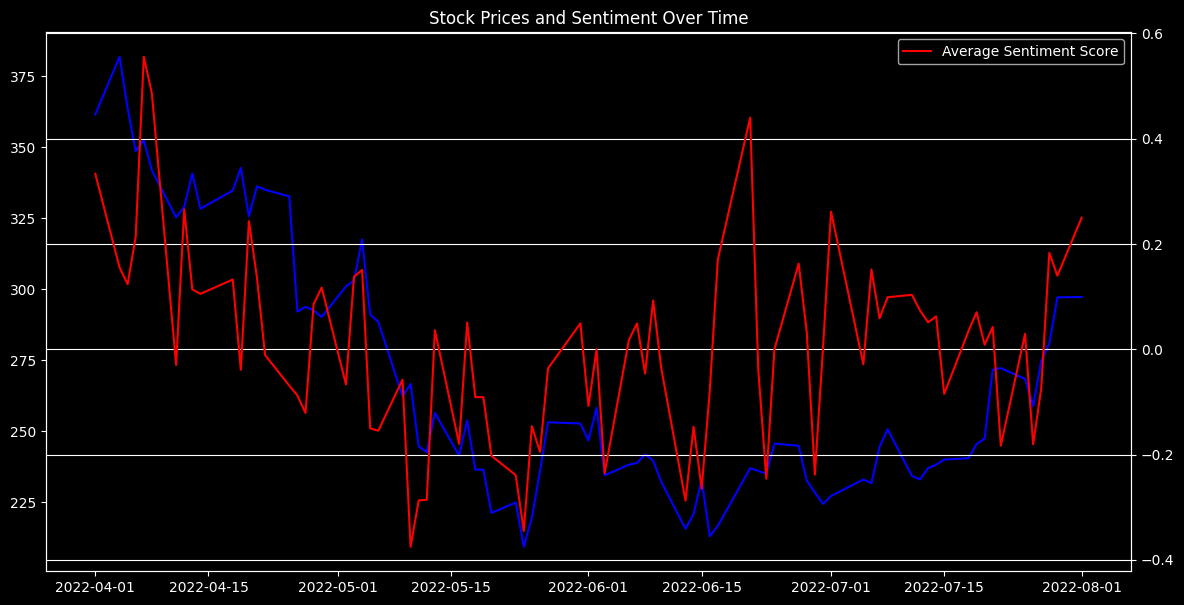

In [86]:
plt.figure(figsize=(14, 7))

# Plotting stock prices
plt.plot(merged_df['Date'], merged_df['Close'], label='Stock Close Price', color='blue')

# Plotting sentiment scores on a secondary axis
plt.twinx()
plt.plot(merged_df['Date'], merged_df['sentiment_score'], label='Average Sentiment Score', color='red')

plt.title('Stock Prices and Sentiment Over Time')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

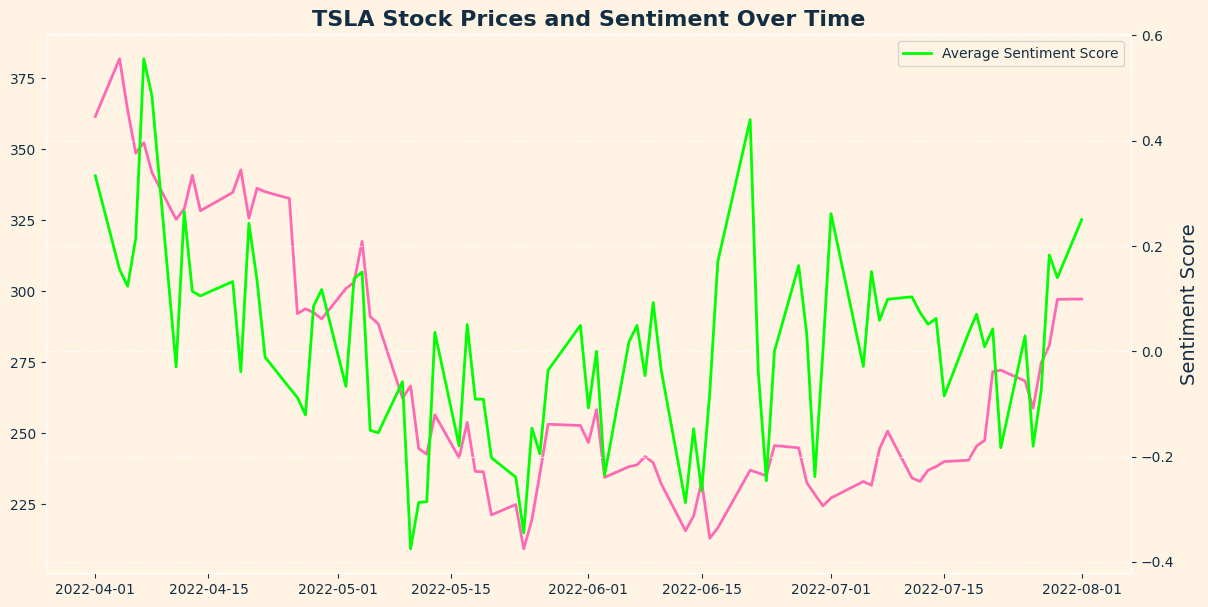

In [197]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plotting stock prices
plt.plot(merged_df['Date'], merged_df['Close'], label='TSLA Stock Close Price', color='hotpink', linewidth=2)

# Plotting sentiment scores on a secondary axis
ax2 = plt.twinx()
ax2.plot(merged_df['Date'], merged_df['sentiment_score'], label='Average Sentiment Score', color='lime', linewidth=2)

# Adding titles and labels with the specified style
plt.title('TSLA Stock Prices and Sentiment Over Time', fontsize=16, fontweight='bold', color='#132e43')
plt.xlabel('Date', fontsize=14, color='#132e43')
ax2.set_ylabel('Sentiment Score', fontsize=14, color='#132e43')

# Customizing the legend and grid
plt.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [87]:
correlation = merged_df['Close'].corr(merged_df['sentiment_score'])
print(f"Correlation between stock price and sentiment: {correlation}")

Correlation between stock price and sentiment: 0.48711337394113724


Merge Sentiment +  Stock DataFrame with Economic Indicators

In [88]:
import pandas as pd

# Define the date range for filtering
start_date = "2022-04-01"
end_date = "2022-08-01"
# Dictionary to store individual DataFrames
dataframes = {}

# Filter the data frames for each indicator individually
for indicator, df in macro_data.items():
    # Ensure 'date' column is in datetime format
    df['date'] = pd.to_datetime(df['date'])
    # Filter the DataFrame by the specified date range
    indicators_tsla = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    # Drop unnecessary columns (realtime_start and realtime_end)
    indicators_tsla = indicators_tsla.drop(columns=['realtime_start', 'realtime_end'])
    # Rename the 'value' column to the name of the indicator
    indicators_tsla = indicators_tsla.rename(columns={"value": indicator})
    indicators_tsla = indicators_tsla.reset_index(drop=True)

    # Store the filtered and renamed DataFrame in the dictionary
    dataframes[indicator] = indicators_tsla  # Save in dataframes dictionary for easy access

# Example: Access the GDP Growth Rate DataFrame
gdp_tsla = dataframes["GDP Growth Rate"]
print("\nGDP Growth Rate DataFrame:")
print(gdp_tsla.head())

# Example: Access the Inflation Rate (CPI) DataFrame
inflation_tsla = dataframes["Inflation Rate (CPI)"]
print("\nInflation Rate (CPI) DataFrame:")
print(inflation_tsla.head())

# Example: Access the Unemployment Rate DataFrame
unemp_tsla = dataframes["Unemployment Rate"]
print("\nUnemployment Rate DataFrame:")
print(unemp_df.head())



GDP Growth Rate DataFrame:
        date  GDP Growth Rate
0 2022-04-01             -0.6
1 2022-07-01              2.7

Inflation Rate (CPI) DataFrame:
        date  Inflation Rate (CPI)
0 2022-04-01               288.764
1 2022-05-01               291.359
2 2022-06-01               294.996
3 2022-07-01               294.977
4 2022-08-01               295.209

Unemployment Rate DataFrame:
        date  Unemployment Rate
0 2014-01-01                6.6
1 2014-02-01                6.7
2 2014-03-01                6.7
3 2014-04-01                6.2
4 2014-05-01                6.3


In [89]:
inflation_tsla

,date,Inflation Rate (CPI)
0,2022-04-01,288.764
1,2022-05-01,291.359
2,2022-06-01,294.996
3,2022-07-01,294.977
4,2022-08-01,295.209


In [90]:
import pandas as pd

# Assuming your DataFrames are named gdp_df, cpi_df, and unemployment_df

# Merge the GDP Growth Rate DataFrame with the Inflation Rate DataFrame
indicators_tsla = pd.merge(gdp_tsla, inflation_tsla, on='date', how='outer')

# Merge the result with the Unemployment Rate DataFrame
indicators_tsla = pd.merge(indicators_tsla, unemp_tsla, on='date', how='outer')

# Display the combined DataFrame
print(indicators_tsla)

        date  GDP Growth Rate  Inflation Rate (CPI)  Unemployment Rate
0 2022-04-01             -0.6               288.764                3.7
1 2022-05-01              NaN               291.359                3.6
2 2022-06-01              NaN               294.996                3.6
3 2022-07-01              2.7               294.977                3.5
4 2022-08-01              NaN               295.209                3.6


In [91]:
indicators_tsla.fillna(method='ffill', inplace=True)
indicators_tsla.fillna(method='bfill', inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\208274136.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  indicators_tsla.fillna(method='ffill', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\208274136.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  indicators_tsla.fillna(method='bfill', inplace=True)


In [92]:
indicators_tsla

,date,GDP Growth Rate,Inflation Rate (CPI),Unemployment Rate
0,2022-04-01,-0.6,288.764,3.7
1,2022-05-01,-0.6,291.359,3.6
2,2022-06-01,-0.6,294.996,3.6
3,2022-07-01,2.7,294.977,3.5
4,2022-08-01,2.7,295.209,3.6


In [93]:
# Merge the DataFrames on the date columns
combined_df = pd.merge(merged_df, indicators_tsla, left_on='Date', right_on='date', how='outer')

# Drop the redundant 'date' column (if desired)
combined_df.drop(columns=['date'], inplace=True)

combined_df.fillna(method='ffill', inplace=True)


# Display the combined DataFrame
print(combined_df)

         Date        Open        High         Low       Close  ...  \
0  2022-04-01  360.383331  364.916656  355.546661  361.529999  ...   
1  2022-04-04  363.126678  383.303345  357.510010  381.816681  ...   
2  2022-04-05  378.766663  384.290009  362.433319  363.753326  ...   
3  2022-04-06  357.823334  359.666656  342.566681  348.586670  ...   
4  2022-04-07  350.796661  358.863342  340.513336  352.420013  ...   
..        ...         ...         ...         ...         ...  ...   
79 2022-07-26  266.513336  267.309998  256.263336  258.859985  ...   
80 2022-07-27  263.809998  275.926666  261.790009  274.820007  ...   
81 2022-07-28  280.066681  283.299988  272.799988  280.899994  ...   
82 2022-07-29  280.700012  298.320007  279.100006  297.149994  ...   
83 2022-08-01  301.276672  311.876678  295.000000  297.276672  ...   

    Stock Name  sentiment_score GDP Growth Rate  Inflation Rate (CPI)  \
0         TSLA         0.333333            -0.6               288.764   
1         TSL

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\3866615816.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='ffill', inplace=True)


In [94]:
combined_df

,Date,Open,High,Low,Close,...,Stock Name,sentiment_score,GDP Growth Rate,Inflation Rate (CPI),Unemployment Rate
0,2022-04-01,360.383331,364.916656,355.546661,361.529999,...,TSLA,0.333333,-0.6,288.764,3.7
1,2022-04-04,363.126678,383.303345,357.510010,381.816681,...,TSLA,0.155556,-0.6,288.764,3.7
2,2022-04-05,378.766663,384.290009,362.433319,363.753326,...,TSLA,0.123596,-0.6,288.764,3.7
3,2022-04-06,357.823334,359.666656,342.566681,348.586670,...,TSLA,0.214286,-0.6,288.764,3.7
4,2022-04-07,350.796661,358.863342,340.513336,352.420013,...,TSLA,0.555556,-0.6,288.764,3.7
...,...,...,...,...,...,...,...,...,...,...,...
79,2022-07-26,266.513336,267.309998,256.263336,258.859985,...,TSLA,-0.180328,2.7,294.977,3.5
80,2022-07-27,263.809998,275.926666,261.790009,274.820007,...,TSLA,-0.074074,2.7,294.977,3.5
81,2022-07-28,280.066681,283.299988,272.799988,280.899994,...,TSLA,0.183099,2.7,294.977,3.5
82,2022-07-29,280.700012,298.320007,279.100006,297.149994,...,TSLA,0.139785,2.7,294.977,3.5


In [95]:
combined_df.to_csv('df_tsla_4_8.csv', index=False)

print("DataFrame saved to 'df_tsla_4_8.csv'")

DataFrame saved to 'df_tsla_4_8.csv'


Preparing the data: selecting features and target variables

In [96]:
features = ['Open', 'High', 'Low','sentiment_score', 'GDP Growth Rate', 'Inflation Rate (CPI)', 'Unemployment Rate']
target = 'Close'

# Create the feature matrix (X) and target vector (y)
X = combined_df[features]
y = combined_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Normalizing the features

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the entire dataset before splitting
X_scaled = scaler.fit_transform(X)

Splitting the data: train test split 

In [98]:
from sklearn.model_selection import train_test_split

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Training the Model 

In [99]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model on normalized data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Testing the model: predictions

In [100]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [101]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 39.49803380754585
R^2 Score: 0.9816791781738348


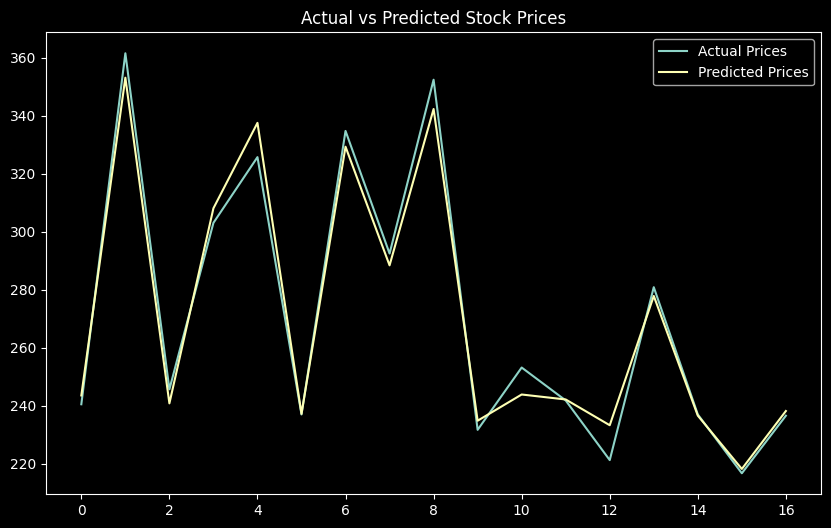

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.show()

In [103]:
import pandas as pd

# Assuming you trained a Random Forest model as `model`
importances = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  # Replace with your actual feature names if necessary
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                Feature  Importance
2                   Low    0.382762
1                  High    0.330025
0                  Open    0.282794
3       sentiment_score    0.002611
6     Unemployment Rate    0.000997
5  Inflation Rate (CPI)    0.000572
4       GDP Growth Rate    0.000239


Model 1: Inflation Rate (CPI) Only


In [104]:
# Selecting Inflation as the only feature
X_inflation = combined_df[['Inflation Rate (CPI)']]
y = combined_df['Close']

# Splitting the data
X_train_inf, X_test_inf, y_train_inf, y_test_inf = train_test_split(X_inflation, y, test_size=0.2, random_state=42)

# Optionally, scale the data
scaler = StandardScaler()
X_train_inf = scaler.fit_transform(X_train_inf)
X_test_inf = scaler.transform(X_test_inf)

# Train the model
model_inf = RandomForestRegressor(n_estimators=100, random_state=42)
model_inf.fit(X_train_inf, y_train_inf)

# Predict and evaluate
y_pred_inf = model_inf.predict(X_test_inf)
mse_inf = mean_squared_error(y_test_inf, y_pred_inf)
r2_inf = r2_score(y_test_inf, y_pred_inf)

print(f'Inflation Only - Mean Squared Error: {mse_inf}, R^2 Score: {r2_inf}')


Inflation Only - Mean Squared Error: 526.2674078359645, R^2 Score: 0.7558954083927448


Model 2: Sentiment Scores only

In [105]:
# Selecting Sentiment Score as the only feature
X_sentiment = combined_df[['sentiment_score']]
y = combined_df['Close']

# Splitting the data
X_train_sent, X_test_sent, y_train_sent, y_test_sent = train_test_split(X_sentiment, y, test_size=0.2, random_state=42)

# Optionally, scale the data
scaler = StandardScaler()
X_train_sent = scaler.fit_transform(X_train_sent)
X_test_sent = scaler.transform(X_test_sent)

# Train the model
model_sent = RandomForestRegressor(n_estimators=100, random_state=42)
model_sent.fit(X_train_sent, y_train_sent)

# Predict and evaluate
y_pred_sent = model_sent.predict(X_test_sent)
mse_sent = mean_squared_error(y_test_sent, y_pred_sent)
r2_sent = r2_score(y_test_sent, y_pred_sent)

print(f'Sentiment Only - Mean Squared Error: {mse_sent}, R^2 Score: {r2_sent}')


Sentiment Only - Mean Squared Error: 2052.116303899618, R^2 Score: 0.0481435771334251


Model 3: Inflation Rate (CPI) and Sentiment Score Together


In [106]:
# Selecting both Inflation and Sentiment Score as features
X_combined = combined_df[['Inflation Rate (CPI)', 'sentiment_score']]
y = combined_df['Close']

# Splitting the data
X_train_comb, X_test_comb, y_train_comb, y_test_comb = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Optionally, scale the data
scaler = StandardScaler()
X_train_comb = scaler.fit_transform(X_train_comb)
X_test_comb = scaler.transform(X_test_comb)

# Train the model
model_comb = RandomForestRegressor(n_estimators=100, random_state=42)
model_comb.fit(X_train_comb, y_train_comb)

# Predict and evaluate
y_pred_comb = model_comb.predict(X_test_comb)
mse_comb = mean_squared_error(y_test_comb, y_pred_comb)
r2_comb = r2_score(y_test_comb, y_pred_comb)

print(f'Inflation and Sentiment - Mean Squared Error: {mse_comb}, R^2 Score: {r2_comb}')


Inflation and Sentiment - Mean Squared Error: 600.237328369943, R^2 Score: 0.7215850996517634


Creating a model with more data from the tweet sentiment analysis

In [107]:
import pandas as pd

# Define the date range for filtering
start_date = pd.to_datetime('2022-02-01')
end_date = pd.to_datetime('2022-09-29')

# Dictionary to store individual DataFrames
dataframes = {}

# Filter the data frames for each indicator individually
for indicator, df in macro_data.items():
    # Ensure 'date' column is in datetime format
    df['date'] = pd.to_datetime(df['date'])
    # Filter the DataFrame by the specified date range
    indicators_tsla = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    # Drop unnecessary columns (realtime_start and realtime_end)
    indicators_tsla = indicators_tsla.drop(columns=['realtime_start', 'realtime_end'])
    # Rename the 'value' column to the name of the indicator
    indicators_tsla = indicators_tsla.rename(columns={"value": indicator})
    indicators_tsla = indicators_tsla.reset_index(drop=True)

    # Store the filtered and renamed DataFrame in the dictionary
    dataframes[indicator] = indicators_tsla  # Save in dataframes dictionary for easy access

# Example: Access the GDP Growth Rate DataFrame
gdp_tsla = dataframes["GDP Growth Rate"]
print("\nGDP Growth Rate DataFrame:")
print(gdp_tsla.head())

# Example: Access the Inflation Rate (CPI) DataFrame
inflation_tsla = dataframes["Inflation Rate (CPI)"]
print("\nInflation Rate (CPI) DataFrame:")
print(inflation_tsla.head())

# Example: Access the Unemployment Rate DataFrame
unemp_tsla = dataframes["Unemployment Rate"]
print("\nUnemployment Rate DataFrame:")
print(unemp_tsla.head())



GDP Growth Rate DataFrame:
        date  GDP Growth Rate
0 2022-04-01             -0.6
1 2022-07-01              2.7

Inflation Rate (CPI) DataFrame:
        date  Inflation Rate (CPI)
0 2022-02-01               284.535
1 2022-03-01               287.553
2 2022-04-01               288.764
3 2022-05-01               291.359
4 2022-06-01               294.996

Unemployment Rate DataFrame:
        date  Unemployment Rate
0 2022-02-01                3.8
1 2022-03-01                3.6
2 2022-04-01                3.7
3 2022-05-01                3.6
4 2022-06-01                3.6


Merging all indicators

In [108]:
import pandas as pd

# Assuming your DataFrames are named gdp_df, cpi_df, and unemployment_df

# Merge the GDP Growth Rate DataFrame with the Inflation Rate DataFrame
indicators_tsla = pd.merge(gdp_tsla, inflation_tsla, on='date', how='outer')

# Merge the result with the Unemployment Rate DataFrame
indicators_tsla = pd.merge(indicators_tsla, unemp_tsla, on='date', how='outer')

# Display the combined DataFrame
print(indicators_tsla)

        date  GDP Growth Rate  Inflation Rate (CPI)  Unemployment Rate
0 2022-02-01              NaN               284.535                3.8
1 2022-03-01              NaN               287.553                3.6
2 2022-04-01             -0.6               288.764                3.7
3 2022-05-01              NaN               291.359                3.6
4 2022-06-01              NaN               294.996                3.6
5 2022-07-01              2.7               294.977                3.5
6 2022-08-01              NaN               295.209                3.6
7 2022-09-01              NaN               296.341                3.5


In [109]:
indicators_tsla.fillna(method='ffill', inplace=True)
indicators_tsla.fillna(method='bfill', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\2098989294.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  indicators_tsla.fillna(method='ffill', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\2098989294.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  indicators_tsla.fillna(method='bfill', inplace=True)


In [110]:
indicators_tsla

,date,GDP Growth Rate,Inflation Rate (CPI),Unemployment Rate
0,2022-02-01,-0.6,284.535,3.8
1,2022-03-01,-0.6,287.553,3.6
2,2022-04-01,-0.6,288.764,3.7
3,2022-05-01,-0.6,291.359,3.6
4,2022-06-01,-0.6,294.996,3.6
5,2022-07-01,2.7,294.977,3.5
6,2022-08-01,2.7,295.209,3.6
7,2022-09-01,2.7,296.341,3.5


In [213]:
sentiment_2 = pd.read_csv('extended_tsla_analysis.csv')
stocks_2 = pd.read_csv('stock_yfinance_data.csv')


In [214]:
sentiment_2

,Date,Tweet,Stock Name,Company Name,sentiment
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",joy
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",optimism
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",anger
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",joy
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",joy
...,...,...,...,...,...
22201,2022-02-01,$TSLA wants to go higher. \n\nLet’s see what t...,TSLA,"Tesla, Inc.",anger
22202,2022-02-01,@elonmusk @Tesla @joerogan For sure. Hence the...,TSLA,"Tesla, Inc.",joy
22203,2022-02-01,Just because why not: for the rest of 2022 I a...,TSLA,"Tesla, Inc.",joy
22204,2022-02-01,Upcoming DD Tonight🧑‍🚀\n•\n$SPY\n$AAPL\n$TSLA\...,TSLA,"Tesla, Inc.",optimism


In [223]:
import pandas as pd

# Assuming sentiment_2 is already loaded and contains your data

# Convert 'Date' column to datetime format
sentiment_2['Date'] = pd.to_datetime(sentiment_2['Date'])

# Define the date range for filtering
start_date = '2022-10-04'
end_date = '2022-10-07'

# Filter DataFrame based on the date range
filtered_df = sentiment_2[(sentiment_2['Date'] >= start_date) & (sentiment_2['Date'] <= end_date)]

# Extract only the 'Tweet' column
tweets = filtered_df['Tweet']

# Print the tweets
print(tweets.to_list())


['Tweet from October 4.', 'Tweet from October 5.', 'Tweet from October 6.', 'Tweet from October 7.']


In [218]:
tweets_df = pd.DataFrame(tweets, columns=['Tweet'])

print(tweets_df)

                   Tweet
0  Tweet from October 4.
1  Tweet from October 5.
2  Tweet from October 6.
3  Tweet from October 7.


In [113]:
stocks_2['Date'] = pd.to_datetime(stocks_2['Date'])
stocks_2['Date'] = stocks_2['Date'].dt.date

In [114]:
start_date = pd.to_datetime('2022-02-01').date()
end_date = pd.to_datetime('2022-09-29').date()

stocks_data_2 = stocks_2[(stocks_2['Stock Name'].isin(['TSLA'])) &(stocks_2['Date'] >= start_date) & 
                       (stocks_2['Date'] <= end_date)] 


In [115]:
stocks_data_2

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
85,2022-02-01,311.736664,314.566681,301.666656,310.416656,310.416656,73138200,TSLA
86,2022-02-02,309.393341,310.500000,296.470001,301.886658,301.886658,66792900,TSLA
87,2022-02-03,294.000000,312.333344,293.506653,297.046661,297.046661,78855600,TSLA
88,2022-02-04,299.073334,312.166656,293.723328,307.773346,307.773346,73625400,TSLA
89,2022-02-07,307.929993,315.923340,300.903320,302.446655,302.446655,60994500,TSLA
...,...,...,...,...,...,...,...,...
247,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,TSLA
248,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,TSLA
249,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,TSLA
250,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,TSLA


In [116]:
sentiment_mapping_2 = {'anger': -1, 'sadness': -1, 'neutral': 0, 'optimism': 1}
sentiment_2['sentiment_score'] = sentiment_2['sentiment'].map(sentiment_mapping_2)

In [117]:
grouped_sentiment_2 = sentiment_2.groupby('Date')['sentiment_score'].mean().reset_index()

In [118]:
indicators_tsla['date'] = pd.to_datetime(indicators_tsla['date'])
grouped_sentiment_2['Date'] = pd.to_datetime(grouped_sentiment_2['Date'])
stocks_data_2['Date'] = pd.to_datetime(stocks_data_2['Date'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\2239920404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_data_2['Date'] = pd.to_datetime(stocks_data_2['Date'])


In [119]:
merged_df_2 = pd.merge(stocks_data_2, grouped_sentiment_2, on='Date', how='left')


In [120]:
merged_df_2

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,sentiment_score
0,2022-02-01,311.736664,314.566681,301.666656,310.416656,310.416656,73138200,TSLA,0.265823
1,2022-02-02,309.393341,310.500000,296.470001,301.886658,301.886658,66792900,TSLA,-0.014085
2,2022-02-03,294.000000,312.333344,293.506653,297.046661,297.046661,78855600,TSLA,-0.168831
3,2022-02-04,299.073334,312.166656,293.723328,307.773346,307.773346,73625400,TSLA,0.253731
4,2022-02-07,307.929993,315.923340,300.903320,302.446655,302.446655,60994500,TSLA,0.046154
...,...,...,...,...,...,...,...,...,...
162,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,TSLA,0.042254
163,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,TSLA,0.166667
164,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,TSLA,0.000000
165,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,TSLA,-0.174603


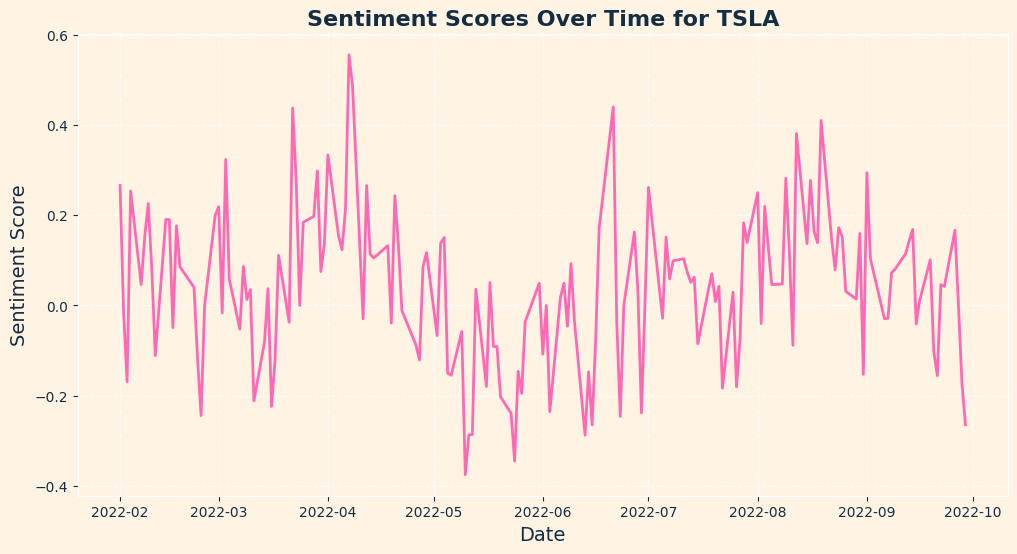

In [203]:
import matplotlib.pyplot as plt

# Plotting the sentiment scores over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df_2['Date'], merged_df_2['sentiment_score'], color='hotpink', linewidth=2)

# Adding titles and labels
plt.title('Sentiment Scores Over Time for TSLA', fontsize=16, fontweight='bold', color='#132e43')
plt.xlabel('Date', fontsize=14, color='#132e43')
plt.ylabel('Sentiment Score', fontsize=14, color='#132e43')

# Customizing the grid
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [121]:
# Merge the DataFrames on the date columns
combined_df_2 = pd.merge(merged_df_2, indicators_tsla, left_on='Date', right_on='date', how='outer')

# Drop the redundant 'date' column (if desired)
combined_df_2.drop(columns=['date'], inplace=True)

combined_df_2.fillna(method='ffill', inplace=True)


# Display the combined DataFrame
print(combined_df_2)

          Date        Open        High         Low       Close  ...  \
0   2022-02-01  311.736664  314.566681  301.666656  310.416656  ...   
1   2022-02-02  309.393341  310.500000  296.470001  301.886658  ...   
2   2022-02-03  294.000000  312.333344  293.506653  297.046661  ...   
3   2022-02-04  299.073334  312.166656  293.723328  307.773346  ...   
4   2022-02-07  307.929993  315.923340  300.903320  302.446655  ...   
..         ...         ...         ...         ...         ...  ...   
163 2022-09-23  283.089996  284.500000  272.820007  275.329987  ...   
164 2022-09-26  271.829987  284.089996  270.309998  276.010010  ...   
165 2022-09-27  283.839996  288.670013  277.510010  282.940002  ...   
166 2022-09-28  283.079987  289.000000  277.570007  287.809998  ...   
167 2022-09-29  282.760010  283.649994  265.779999  268.209991  ...   

     Stock Name  sentiment_score GDP Growth Rate  Inflation Rate (CPI)  \
0          TSLA         0.265823            -0.6               284.535   

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2124\3012004175.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df_2.fillna(method='ffill', inplace=True)


In [122]:
combined_df_2

,Date,Open,High,Low,Close,...,Stock Name,sentiment_score,GDP Growth Rate,Inflation Rate (CPI),Unemployment Rate
0,2022-02-01,311.736664,314.566681,301.666656,310.416656,...,TSLA,0.265823,-0.6,284.535,3.8
1,2022-02-02,309.393341,310.500000,296.470001,301.886658,...,TSLA,-0.014085,-0.6,284.535,3.8
2,2022-02-03,294.000000,312.333344,293.506653,297.046661,...,TSLA,-0.168831,-0.6,284.535,3.8
3,2022-02-04,299.073334,312.166656,293.723328,307.773346,...,TSLA,0.253731,-0.6,284.535,3.8
4,2022-02-07,307.929993,315.923340,300.903320,302.446655,...,TSLA,0.046154,-0.6,284.535,3.8
...,...,...,...,...,...,...,...,...,...,...,...
163,2022-09-23,283.089996,284.500000,272.820007,275.329987,...,TSLA,0.042254,2.7,296.341,3.5
164,2022-09-26,271.829987,284.089996,270.309998,276.010010,...,TSLA,0.166667,2.7,296.341,3.5
165,2022-09-27,283.839996,288.670013,277.510010,282.940002,...,TSLA,0.000000,2.7,296.341,3.5
166,2022-09-28,283.079987,289.000000,277.570007,287.809998,...,TSLA,-0.174603,2.7,296.341,3.5


In [123]:
combined_df_2.to_csv('df_tsla_2_9.csv', index=False)

print("DataFrame saved to 'df_tsla_2_9.csv'")

DataFrame saved to 'df_tsla_2_9.csv'


Preparing the data: selecting features and target variables

In [124]:
features = ['Open', 'High', 'Low','sentiment_score', 'GDP Growth Rate', 'Inflation Rate (CPI)', 'Unemployment Rate']
target = 'Close'

# Create the feature matrix (X) and target vector (y)
X = combined_df_2[features]
y = combined_df_2[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Normalizing the Features

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the entire dataset before splitting
X_scaled = scaler.fit_transform(X)

Splitting the data: train test split

In [126]:
from sklearn.model_selection import train_test_split

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Training the Model

In [127]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model on normalized data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Testing the model: predictions

In [128]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [129]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 81.16957859835003
R^2 Score: 0.9270107860148113


In [130]:
import pandas as pd

# Define the features to lag and the target
features_to_lag = ['Open', 'High', 'Low', 'sentiment_score']
macroeconomic_features = ['GDP Growth Rate', 'Inflation Rate (CPI)', 'Unemployment Rate']
target = 'Close'

# Adding 1 day lagged features for stock prices and sentiment score
for feature in features_to_lag:
    combined_df_2[f'{feature}_lag1'] = combined_df_2[feature].shift(1)

# Optionally, add lag for macroeconomic indicators (experiment with different lags)
for feature in macroeconomic_features:
    combined_df_2[f'{feature}_lag1'] = combined_df_2[feature].shift(1)  # Experiment with other lags too

# Update the features list to include lagged features
lagged_features = [f'{feature}_lag1' for feature in features_to_lag + macroeconomic_features]
updated_features = features_to_lag + macroeconomic_features + lagged_features

# Drop the first row after lagging to avoid NaN values
combined_df_2.dropna(inplace=True)

# Create the feature matrix (X) and target vector (y)
X = combined_df_2[updated_features]
y = combined_df_2[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now you can proceed with your model training as usual


In [131]:


# Assuming the code for adding lags and preparing X and y is already run

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, inspect the first few predictions
print("First few predictions vs actual values:")
for i in range(5):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")


Mean Squared Error: 24.438040956629134
R-squared: 0.9822633197309025
First few predictions vs actual values:
Predicted: 238.20406030005645, Actual: 232.663330078125
Predicted: 251.96197041474323, Actual: 250.76333618164065
Predicted: 209.51667421912197, Actual: 209.3866729736328
Predicted: 331.80262291023377, Actual: 332.67333984375
Predicted: 230.53394412256907, Actual: 235.07000732421875


In [224]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature importance from coefficients
coefficients = model.coef_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Mean Squared Error: 24.438040956629134
R-squared: 0.9822633197309025

Feature Importance:
                      Feature  Coefficient
2                         Low    34.102219
1                        High    24.694461
0                        Open   -20.721383
5        Inflation Rate (CPI)    -6.456488
12  Inflation Rate (CPI)_lag1     5.881661
8                   High_lag1    -3.807552
7                   Open_lag1     3.116837
10       sentiment_score_lag1    -0.711600
3             sentiment_score     0.691519
13     Unemployment Rate_lag1    -0.663464
9                    Low_lag1    -0.610901
6           Unemployment Rate    -0.363152
11       GDP Growth Rate_lag1    -0.046569
4             GDP Growth Rate    -0.046569


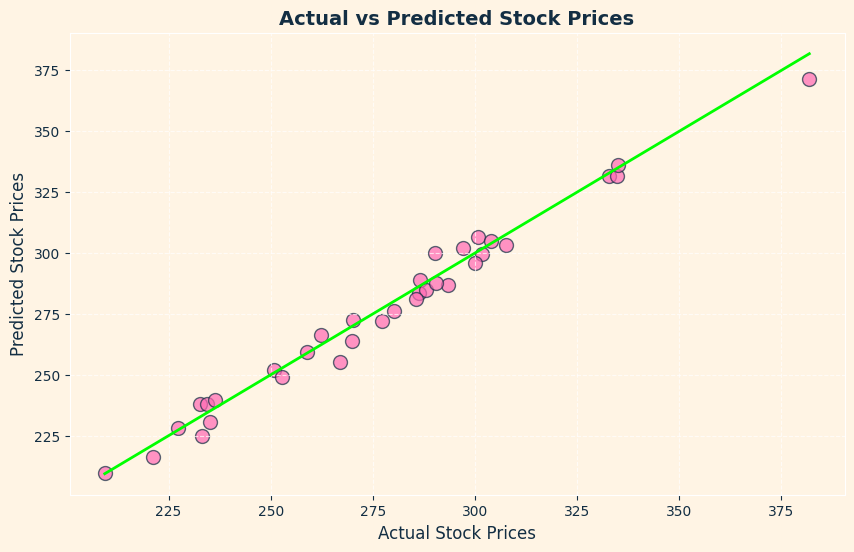

In [198]:
import matplotlib.pyplot as plt

# Plot the Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='hotpink', edgecolor='#132e43', alpha=0.7, s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='lime', linewidth=2)  # Perfect prediction line
plt.title('Actual vs Predicted Stock Prices', fontsize=14, fontweight='bold', color='#132e43')
plt.xlabel('Actual Stock Prices', fontsize=12, color='#132e43')
plt.ylabel('Predicted Stock Prices', fontsize=12, color='#132e43')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


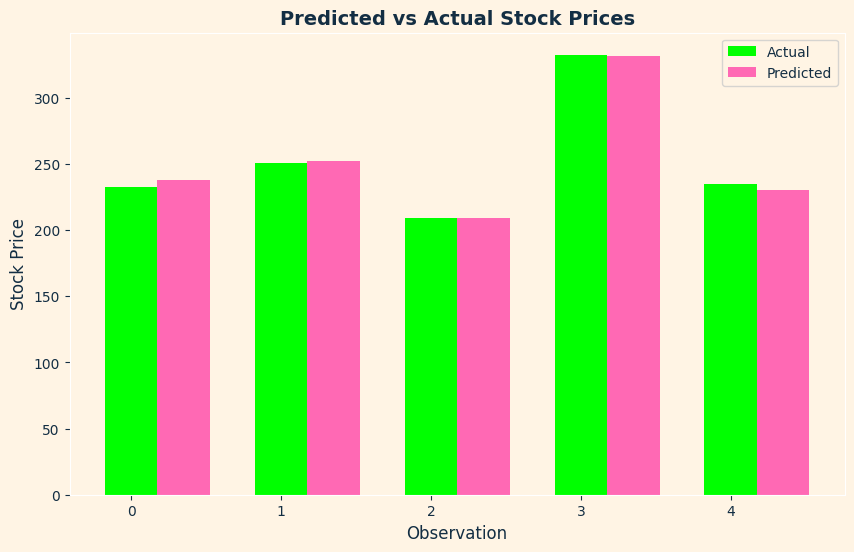

In [199]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for plotting
predicted_values = [
    238.20406030005645, 
    251.96197041474323, 
    209.51667421912197, 
    331.80262291023377, 
    230.53394412256907
]
actual_values = [
    232.663330078125, 
    250.76333618164065, 
    209.3866729736328, 
    332.67333984375, 
    235.07000732421875
]

# Define the positions on the x-axis
indices = np.arange(len(predicted_values))

plt.figure(figsize=(10, 6))
bar_width = 0.35

# Plot actual values
plt.bar(indices, actual_values, bar_width, color='lime', label='Actual')

# Plot predicted values
plt.bar(indices + bar_width, predicted_values, bar_width, color='hotpink', label='Predicted')

# Labels and title
plt.xlabel('Observation', fontsize=12, color='#132e43')
plt.ylabel('Stock Price', fontsize=12, color='#132e43')
plt.title('Predicted vs Actual Stock Prices', fontsize=14, fontweight='bold', color='#132e43')

# Add legend
plt.legend()

# Display the plot
plt.show()


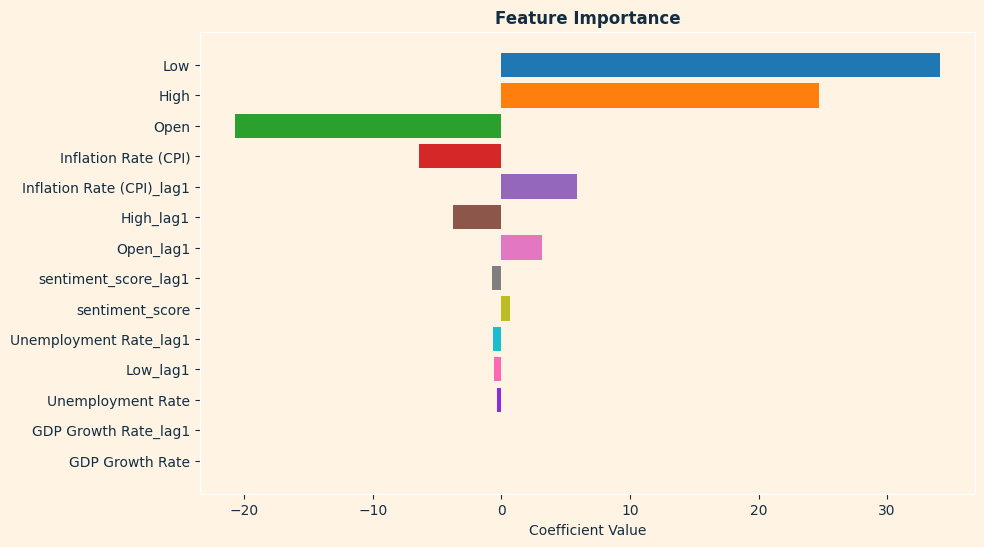

In [225]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for feature importance
feature_importance = {
    'Feature': ['Low', 'High', 'Open', 'Inflation Rate (CPI)', 'Inflation Rate (CPI)_lag1', 'High_lag1', 
                'Open_lag1', 'sentiment_score_lag1', 'sentiment_score', 'Unemployment Rate_lag1', 
                'Low_lag1', 'Unemployment Rate', 'GDP Growth Rate_lag1', 'GDP Growth Rate'],
    'Coefficient': [34.102219, 24.694461, -20.721383, -6.456488, 5.881661, -3.807552, 
                    3.116837, -0.711600, 0.691519, -0.663464, -0.610901, -0.363152, -0.046569, -0.046569]
}

# Convert to DataFrame
df_feature_importance = pd.DataFrame(feature_importance)

# Sort by absolute value of Coefficient
df_feature_importance['Abs_Coefficient'] = df_feature_importance['Coefficient'].abs()
df_feature_importance = df_feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Define a color palette (You can customize this as needed)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff69b4', '#8a2be2', '#00ff00', '#ff6347']

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the largest coefficient at the top
plt.show()


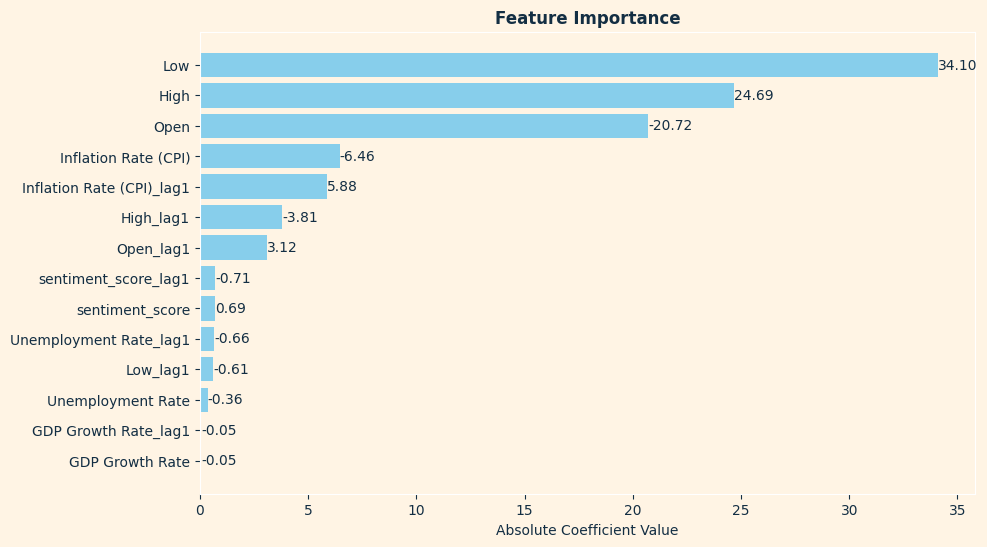

In [226]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for feature importance
feature_importance = {
    'Feature': ['Low', 'High', 'Open', 'Inflation Rate (CPI)', 'Inflation Rate (CPI)_lag1', 'High_lag1', 
                'Open_lag1', 'sentiment_score_lag1', 'sentiment_score', 'Unemployment Rate_lag1', 
                'Low_lag1', 'Unemployment Rate', 'GDP Growth Rate_lag1', 'GDP Growth Rate'],
    'Coefficient': [34.102219, 24.694461, -20.721383, -6.456488, 5.881661, -3.807552, 
                    3.116837, -0.711600, 0.691519, -0.663464, -0.610901, -0.363152, -0.046569, -0.046569]
}

# Convert to DataFrame
df_feature_importance = pd.DataFrame(feature_importance)

# Use absolute value for sorting and plotting
df_feature_importance['Abs_Coefficient'] = df_feature_importance['Coefficient'].abs()

# Sort by absolute value of Coefficient in descending order
df_feature_importance = df_feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the largest coefficient at the top

# Annotate bars with original coefficient values
for index, value in enumerate(df_feature_importance['Abs_Coefficient']):
    plt.text(value, index, f'{df_feature_importance["Coefficient"].iloc[index]:.2f}', va='center')

plt.show()


In [ ]:
features = ['Open', 'High', 'Low','sentiment_score', 'GDP Growth Rate', 'Inflation Rate (CPI)', 'Unemployment Rate']
target = 'Close'

# Create the feature matrix (X) and target vector (y)
X = combined_df_2[features]
y = combined_df_2[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
